<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
   Flower Recognition Using CNN + Transfer Learning Models
</div>


<div style="text-align: center; font-size:140%; font-weight: bold; color: #20a0ff;">
     CNN | VGG16 - InceptionV3 - NasNetMobile - EfficientNetB3 - EfficientNetV2S - ConvNeXtTiny
</div>

    
---
    
<div style="text-align: center;">
  <b>Duygu Jones | Data Scientist | Sep 2024 </b>
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> |
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> |
  <a href="https://github.com/Duygu-Jones">GitHub</a> |
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> |
  <a href="https://medium.com/@duygujones">Medium</a> |
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</div>    

<p align="center">
  <img src="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-031-12413-6_59/MediaObjects/520480_1_En_59_Fig3_HTML.png"
</p>

---

### <font color=#20a0ff> <b>Project Overview</b> <font>
    
**Flower Recognition Using CNN and Transfer Learning**
    
This project utilizes **Convolutional Neural Networks (CNN) and Transfer Learning** to classify images of flowers into five distinct categories accurately. The goal is to aid botanical research and educational applications by automating flower identification, leveraging a dataset composed of images collected from various online sources.

    
#### <font color=#20a0ff> <b>Importance of Automated Flower Recognition</b> <font>

Automated recognition systems are essential in botany for the efficient cataloging of species, monitoring biodiversity, and aiding in ecological conservation. These systems provide quick and accurate identification of various flower species, facilitating educational outreach and research.
    

#### <font color=#20a0ff> <b>Project Execution Steps</b> <font>

1. **Image Preprocessing**: Adjusting images to a consistent scale and applying data augmentation techniques to improve model robustness.
2. **Normalization**: Standardizing pixel values across all images to facilitate model training.
3. **Model Development**: Employing CNN for feature extraction and Transfer Learning to leverage pre-trained networks, enhancing the ability to distinguish among the flower classes.
4. **Performance Evaluation**: Assessing accuracy and making iterative improvements to optimize the model for real-world application.


#### <font color=#20a0ff> <b>Applications and Impact</b> <font>

- **Educational Tools**: Enhancing botanical education by providing tools that can identify and classify flowers accurately and swiftly.
- **Conservation Efforts**: Assisting in the documentation and monitoring of plant species for conservation projects.
- **Agricultural Planning**: Aiding in the identification of plant species for crop and garden management.

#### <font color=#20a0ff> <b>Conclusion</b> <font>

This project demonstrates the significant potential of CNN and Transfer Learning in the field of flower recognition, offering a valuable tool for educational, conservational, and agricultural applications. It highlights the synergy between technology and botany, promoting a deeper understanding and appreciation of plant diversity.

---

### <font color=#20a0ff> <b>About the Dataset</b><font>

The **Flower Recognition Dataset** consists of 4242 images derived from online sources like Flickr, Google Images, and Yandex Images. It is designed to enhance the development of plant recognition models using photographs. This dataset is categorized into five classes: **Daisy**, **Tulip**, **Rose**, **Sunflower**, and **Dandelion**, with each class containing approximately 800 photos. The images maintain their original proportions, varying in size but typically around 320x240 pixels. They are not standardized to a single scale, adding to the complexity and realism of the task.

- **Source:** Images scraped from Flickr, Google Images, and Yandex Images
- **Classes:** Daisy, Tulip, Rose, Sunflower, Dandelion
- **Resolution:** Approx. 320x240 pixels
- **Total Images:** 4242
- **Variability:** Different proportions, not resized to a single scale

    
- > *This dataset is ideal for training and testing machine learning models aimed at recognizing diverse plant species, supporting both academic research and practical applications in botany.*
- > *Original dataset can be found on Kaggle:* [Flower Recognition](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition)
---

### Project Summary:


In this project;

- A detailed exploratory analysis was conducted to identify the images in each class, determine their dimensions, decide whether scaling was needed, and examine the data distribution across classes.
- Preprocessing was performed using **ImageDataGenerator** before each model, ensuring it was tailored to the specific model’s requirements.
- Augmentation and rescaling were applied where needed, except for models that handled preprocessing internally. 
    (If preprocessing were applied within the model, the train-test split would need to be adjusted to work with TensorFlow.)
- For transfer learning models, base models were created by freezing the pretrained layers. After training these base models, fine-tuning was done by unfreezing the pretrained layers and using the best weights from the initial training phase. Each model’s performance was evaluated by making predictions on the test data.

*Since the dataset is small to medium-sized, the smallest versions of the transfer learning models were chosen to avoid overfitting. However, it was observed that even these smaller models were slightly large for the dataset.*


#### Rest of the Transfer Learning Models:
This study, in collaboration with **Fatma Nur Azman**, applies a CNN model along with 10 different transfer learning models to the Flowers Recognition dataset. Additional models explored include:
- EfficientNetB3
- Xception
- ResNet152V2
- DenseNet201
- MobileNetV2

For further details on these models and their implementation, please refer to the Kaggle notebook available at this link: [Flower | CNN + 10 Transfer Learning Models | Part-2](https://www.kaggle.com/code/fnurazman/flower-cnn-10-transfer-learning-models-part-2#Transfer-Learning-Models).

## Import Libs

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras for building CNN and Transfer Learning Models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, Dense,Activation, Flatten, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow import keras

# For handling image files
from PIL import Image
import cv2

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Checking TensorFlow version
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.16.1


## Load the Data

In [2]:
data_dir = "/kaggle/input/flowers-recognition/flowers"
flower_categories = os.listdir(data_dir)

print(f" Flower classes : {flower_categories}")

 Flower classes : ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']


<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Exploring the Data</p>

- > The dataset consists of 5 distinct classes, making it a multiclass classification problem.

### Class Distributions

In [3]:
classes = []
num_files = []

for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        classes.append(category)
        num_files.append(len(os.listdir(category_path)))


# Printing the classes and the number of files in each category
print(f"Flower classes: {classes}")
print(f"Number of files in each class: {num_files}")

Flower classes: ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
Number of files in each class: [1052, 764, 733, 984, 784]


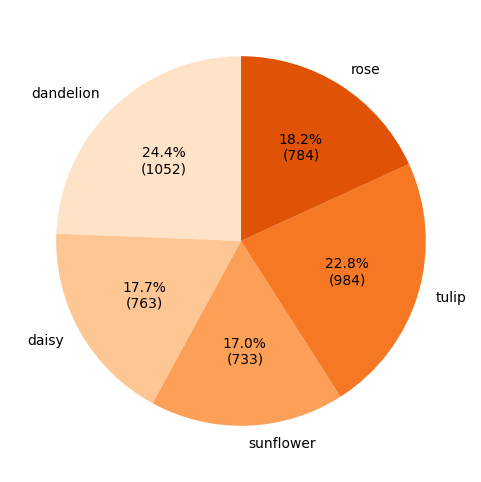

In [21]:
colors = sns.color_palette("Oranges")


def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(6,6))
plt.pie(num_files, labels=classes, autopct=lambda pct: func(pct, num_files),
        startangle=90, colors=colors);

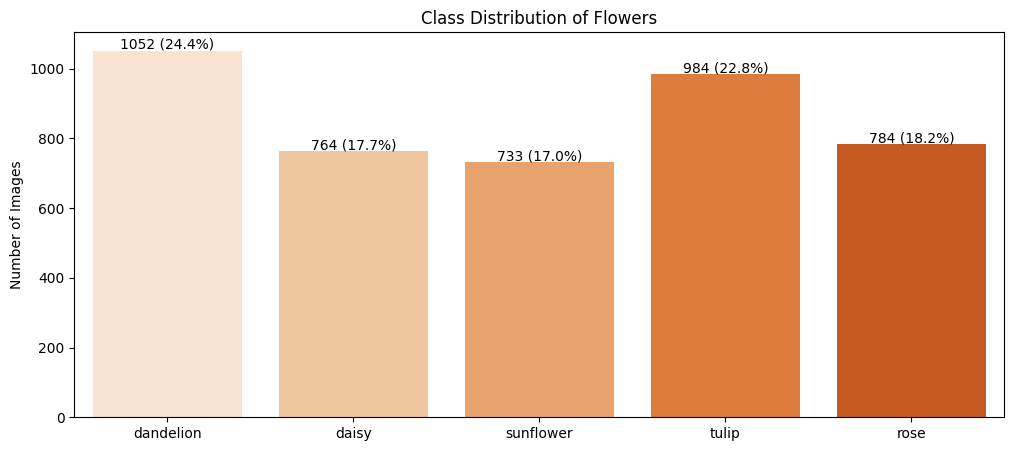

In [5]:
# Class Distribution
def plot_class_distribution(classes, num_files):
    total = sum(num_files)  # Total number of images
    plt.figure(figsize=(12, 5))
    sns.barplot(x=classes, y=num_files, palette=colors)

    for i in range(len(num_files)):
        count = num_files[i]
        pct = count / total * 100
        plt.text(i, count + 5, f'{count} ({pct:.1f}%)', ha='center')

    plt.title('Class Distribution of Flowers')
    plt.ylabel('Number of Images')
    plt.show()

# Call the function
plot_class_distribution(classes, num_files)

### Display Random Images from Each Classes

In [6]:
import random
import matplotlib.image as mpimg

# Function to display 5 random images from a category
def display_random_images(category, num_images=5):
    category_path = os.path.join(data_dir, category)  # data_dir is already defined earlier
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        selected_images = random.sample(images, num_images)

        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        for i, image_name in enumerate(selected_images):
            image_path = os.path.join(category_path, image_name)
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"Shape: {img.shape}")
        plt.tight_layout()
        plt.show()

In [7]:
classes

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

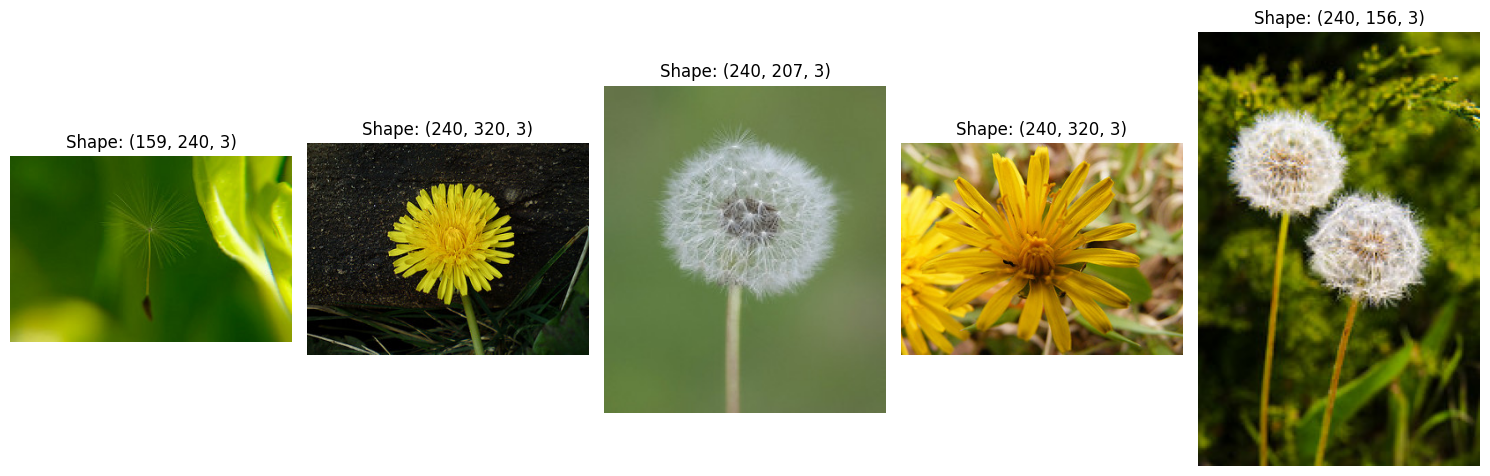

In [8]:
# Call the function for a specific class and display 5 random images
display_random_images('dandelion')

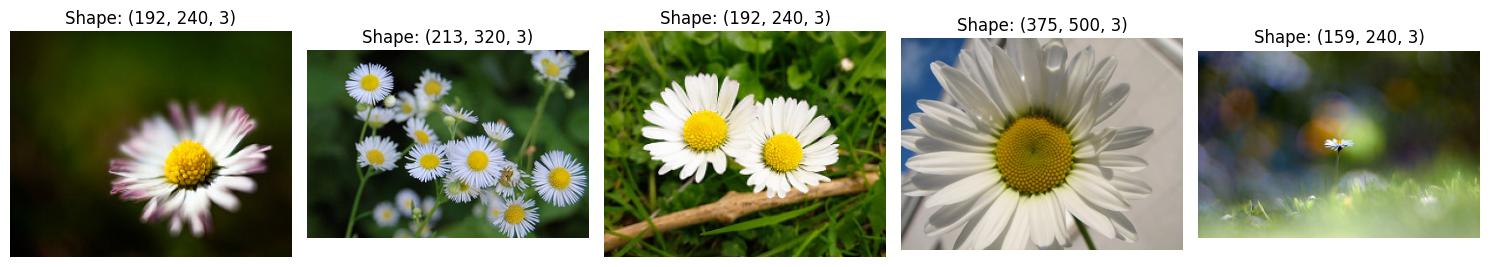

In [9]:
# Call the function for a specific class and display 5 random images
display_random_images('daisy')

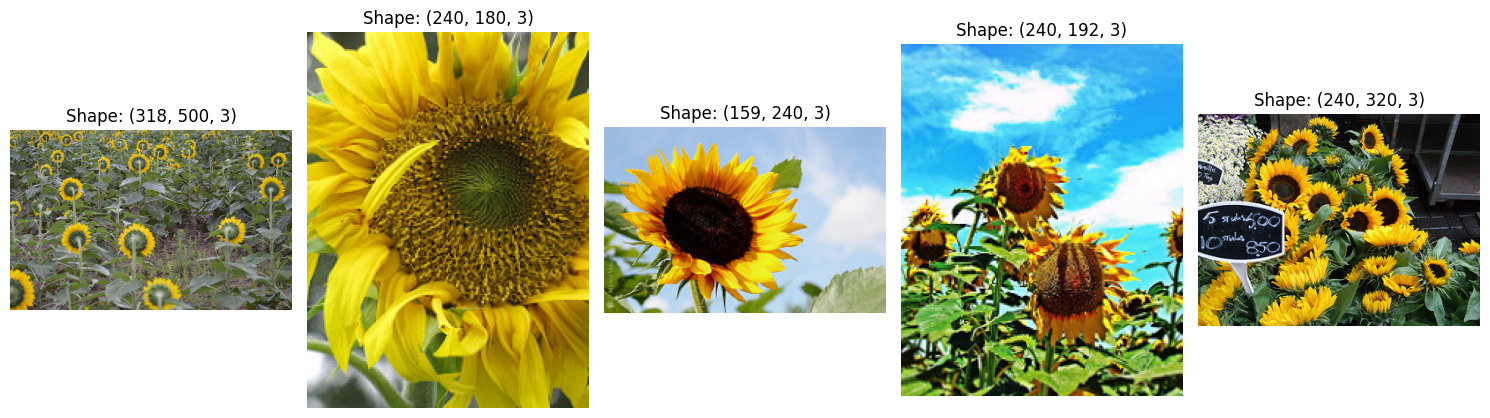

In [10]:
# Call the function for a specific class and display 5 random images
display_random_images('sunflower')

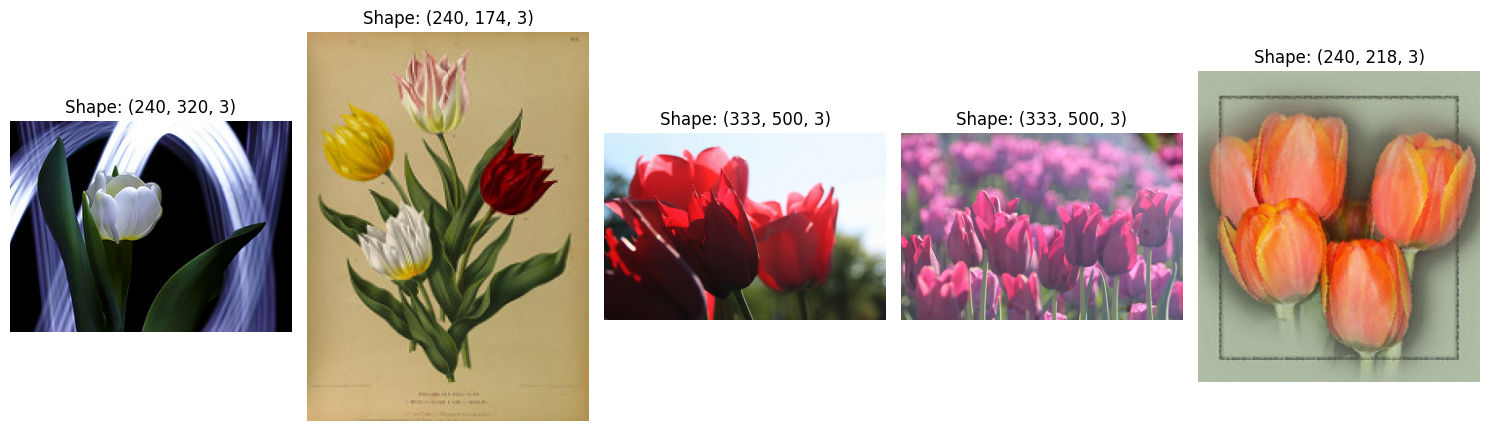

In [11]:
# Call the function for a specific class and display 5 random images
display_random_images('tulip')

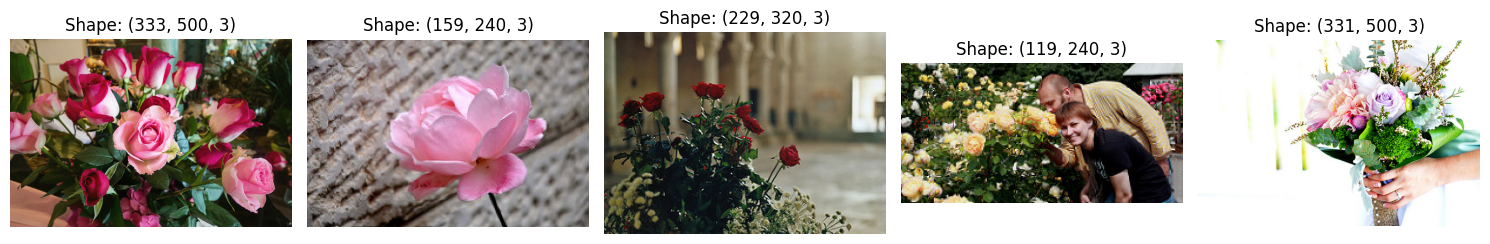

In [12]:
# Call the function for a specific class and display 5 random images
display_random_images('rose')

### Check Pixel Values

In [13]:
# Let's look at the min and max pixel values of an image from each class at index 17

for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)

        if len(images) > 17:  # Check if index 17 exists
            image_name = images[17]
            image_path = os.path.join(category_path, image_name)
            img = mpimg.imread(image_path)
            print(f'{category} index 17 max: {img.max()}')
            print(f'{category} index 17 min: {img.min()}')
        else:
            print(f"{category} does not have an image at index 17.")

dandelion index 17 max: 255
dandelion index 17 min: 0
daisy index 17 max: 255
daisy index 17 min: 0
sunflower index 17 max: 255
sunflower index 17 min: 0
tulip index 17 max: 255
tulip index 17 min: 0
rose index 17 max: 255
rose index 17 min: 0


- Pixel values range from 0 to 255, so they will be scaled to between 0 and 1 before training the model.

### Check Average Shape of All Images

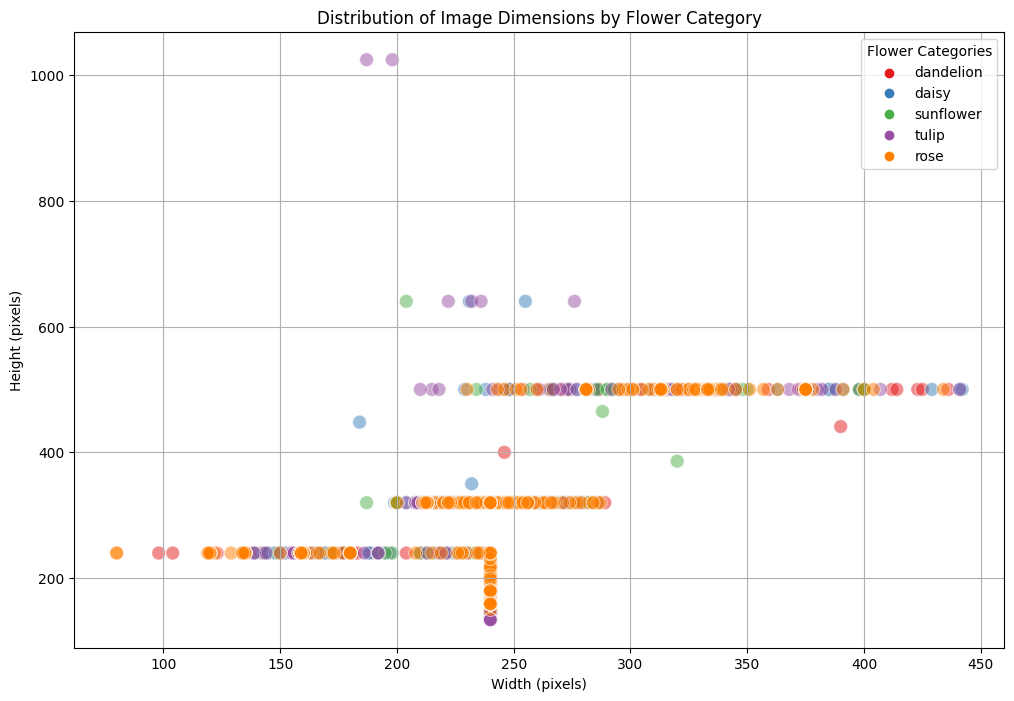

Mean height (x): 253.07
Mean width (y): 338.38


In [14]:
# Distribution of Image Dimensions by Flower Category

x, y, categories = [], [], []

for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    files = os.listdir(category_path)

    for image in files:
        try:
            img = mpimg.imread(os.path.join(category_path, image))
            d1, d2, _ = img.shape
            x.append(d1)
            y.append(d2)
            categories.append(category)
        except OSError as e:
            print(f"Error processing {image}: {e}")
            continue

plt.figure(figsize=(12, 8))
sns.scatterplot(x=x, y=y, hue=categories, palette='Set1', alpha=0.5, s=100)
plt.title('Distribution of Image Dimensions by Flower Category')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend(title='Flower Categories')
plt.grid(True)
plt.show()

print(f'Mean height (x): {np.mean(x):.2f}')
print(f'Mean width (y): {np.mean(y):.2f}')


Considering the scatter plot distribution and the average dimensions of the images (Mean height: 253.07 pixels, Mean width: 338.38 pixels),    
selecting a uniform size of 256x256 or 224x224 pixels is strategic. This size:

- Is close to the mean width, ensuring minimal distortion or loss of information.
- These sizes are optimal for most pre-trained models used in transfer learning, ensuring compatibility and efficiency in model training.
- These sizes, slightly larger than the average dimensions, helps in preserving image details critical for accurate feature extraction in deep learning.

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Preprocessing</p>

In [15]:
classes

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

## Train | Test Split

In [16]:
# Define key parameters
data_dir = "/kaggle/input/flowers-recognition/flowers"  # Path to the dataset
seed = 42 # For reproducibility

In [17]:
# TRAIN-TEST SPLIT: AS DATAFRAME

# List the categories (classes)
flower_categories = os.listdir(data_dir)

# Create empty lists for file paths and labels
filepaths = []
labels = []

# Populate lists with file paths and corresponding labels
for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    file_list = os.listdir(category_path)
    for file in file_list:
        file_path = os.path.join(category_path, file)
        filepaths.append(file_path)
        labels.append(category)

# Create a DataFrame with filepaths and labels
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

# Separate the data into training and test sets with stratification
train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed, stratify=df['labels'])

# Split test_df into test_data and val_data (50% each, meaning 10% overall for both)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=seed, stratify=test_df['labels'])

# Print the number of rows in each set
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 3453
Validation size: 432
Test size: 432


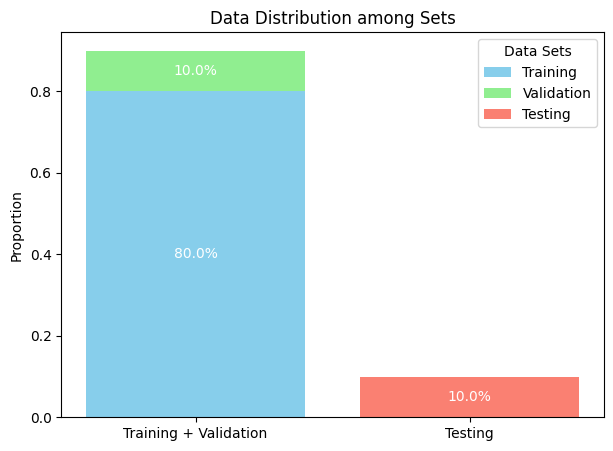

In [18]:
# Plot the data size for each dataset
train_size = len(train_df)
val_size = len(val_df)
test_size = len(test_df)

# Calculate total and ratios
total_size = train_size + val_size + test_size
train_ratio = train_size / total_size
val_ratio = val_size / total_size
test_ratio = test_size / total_size

# Prepare data for stacked bar chart
data_sets = ['Training + Validation', 'Testing']
train_val_values = [train_ratio, 0]  # No training data in Testing group
val_values = [val_ratio, 0]          # No validation data in Testing group
test_values = [0, test_ratio]        # Only test data in Testing group

# Create the plot
fig, ax = plt.subplots(figsize=(7, 5))

# Define colors
colors = ['skyblue', 'lightgreen', 'salmon']

# Create bars
ax.bar(data_sets, train_val_values, color=colors[0], label='Training')
ax.bar(data_sets, val_values, bottom=train_val_values, color=colors[1], label='Validation')
ax.bar(data_sets, test_values, color=colors[2], label='Testing')

# Labels, title, and legend
ax.set_ylabel('Proportion')
ax.set_title('Data Distribution among Sets')
ax.legend(title='Data Sets', loc='upper right')  # Adjust location to ensure visibility

# Show percentages on bars
ax.text(0, train_ratio/2, f'{train_ratio:.1%}', ha='center', va='center', color='white', fontsize=10)
ax.text(0, train_ratio + val_ratio/2, f'{val_ratio:.1%}', ha='center', va='center', color='white', fontsize=10)
ax.text(1, test_ratio/2, f'{test_ratio:.1%}', ha='center', va='center', color='white', fontsize=10)

plt.show()

## User-Defined-Fonctions

In [19]:
############## Evaluate the model ##################
def model_evaluation(model):
    train_score = model.evaluate(train_gen, verbose=1)
    valid_score = model.evaluate(val_gen, verbose=1)
    test_score = model.evaluate(test_gen, verbose=1)

    print('-' * 20)
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    print('-' * 20)


######### Displaying the model performance ##########
def model_performance(history):
    # Extract training and validation statistics
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Generate a range for epochs
    epochs = range(1, len(tr_acc) + 1)

    # Setup the plotting environment
    plt.figure(figsize=(20, 7))
    plt.style.use('fivethirtyeight')

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, tr_acc, 'blue', marker='o',label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', marker='o',label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, tr_loss, 'blue',marker='o', label='Training loss')
    plt.plot(epochs, val_loss, 'orange', marker='o',label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



############### Confusion Matrix ####################
from itertools import product

def plot_confusion_matrix(test_gen, y_pred):
    classes = list(test_gen.class_indices.keys())
    cm = confusion_matrix(test_gen.classes, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, cmap='Oranges')
    plt.title('Confusion Matrix', fontsize=12)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    thresh = cm.max() / 2
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], ha='center', fontsize=10,
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> CNN Model</p>


![](https://editor.analyticsvidhya.com/uploads/59954intro%20to%20CNN.JPG)

- Image Credit: [www.analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2022/01/convolutional-neural-network-an-overview/)
- [Convolutional Neural Network (CNN) Tensorflow Documentation](https://www.tensorflow.org/tutorials/images/cnn)

## Simple CNN Model Architecture:

### Preprocessing For CNN (includes rescaling to the range [0, 255]):

In [ ]:
# Define key parameters for the model:

target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32                 # Batch size for model training

# Create ImageDataGenerator for train and validation sets (without augmentation)

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0)  # Normalize pixel values between 0 and 1


# 1) Load training data
train_gen = image_gen.flow_from_dataframe(
    train_df,                    # DataFrame with train data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=True)                  # Shuffle training data


# 2) Load validation data
val_gen = image_gen.flow_from_dataframe(
    val_df,                       # DataFrame with validation data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=False)                # No need to shuffle validation data



# 3) Test Data
test_gen = image_gen.flow_from_dataframe(
    test_df,                      # DataFrame with test data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=False)                # No need to shuffle test data


# Print the number of samples in each set
print(f"Training data size: {train_gen.samples}")
print(f"Validation data size: {val_gen.samples}")
print(f"Test data size: {test_gen.samples}")

Found 3453 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.

Training data size: 3453

Validation data size: 432

Test data size: 432


In [ ]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32                 # Batch size for model training
epochs = 50                     # Number of epochs for training


# 1) CNN Model Architecture
CNN = Sequential()

CNN.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.2))

# with regularization
CNN.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.3))

CNN.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))

# Global Max Pooling Layer
CNN.add(GlobalMaxPooling2D())

# ANN Layers with regularization
CNN.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN.add(Dropout(0.4))

CNN.add(Dense(5, activation='softmax'))



# 2) Compile the Model:
CNN.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

CNN.summary()

# 3) Callbacks Parameters: EarlyStopping and Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)


# 4) Train the model
history = CNN.fit(
                train_gen,               # Rescaled
                validation_data=val_gen, # Rescaled
                batch_size=batch_size,
                epochs=epochs,
                callbacks=[early_stop, lr_scheduler])

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 275ms/step - accuracy: 0.3857 - loss: 2.5755 - val_accuracy: 0.2477 - val_loss: 1.7976 - learning_rate: 5.0000e-04

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.5141 - loss: 1.3841 - val_accuracy: 0.2523 - val_loss: 1.7189 - learning_rate: 5.0000e-04

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.5796 - loss: 1.2596 - val_accuracy: 0.3958 - val_loss: 1.5649 - learning_rate: 5.0000e-04

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.6173 - loss: 1.1819 - val_accuracy: 0.6157 - val_loss: 1.3549 - learning_rate: 5.0000e-04

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - accuracy: 0.6407 - loss: 1.1023 - val_accuracy: 0.6644 - val_loss: 1.1069 - learning_rate: 5.0000e-04

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 140ms/step - accuracy: 0.6526 - loss: 1.0805 - val_accuracy: 0.6782 - val_loss: 1.0095 - learning_rate: 5.0000e-04

Epoch 7/50

108/108 ━━━━━━━━━━━━━━

In [ ]:
train_score = CNN.evaluate(train_gen, verbose=1)
valid_score = CNN.evaluate(val_gen, verbose=1)
test_score = CNN.evaluate(test_gen, verbose=1)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.9424 - loss: 0.3610

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.8266 - loss: 0.6809

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8572 - loss: 0.6039

--------------------

Train Loss:  0.36057227849960327

Train Accuracy:  0.9365769028663635

--------------------

Validation Loss:  0.6021626591682434

Validation Accuracy:  0.8425925970077515

--------------------

Test Loss:  0.6254724860191345

Test Accuracy:  0.8425925970077515

--------------------


## Fine-Tuning for CNN

### ImageGenarator with Augmentation

In [ ]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32                 # Batch size for model training
epochs = 50                     # Number of epochs for training

In [ ]:
# 1) Create ImageDataGenerator for train data With Augmentation
train_aug_generator = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values
    rotation_range=15,          # Randomly rotate images by 15 degrees
    width_shift_range=0.1,      # Horizontally shift images by 10%
    height_shift_range=0.1,     # Vertically shift images by 10%
    shear_range=0.1,            # Shear transformation reduced
    zoom_range=0.1,             # Zoom reduced to 10%
    horizontal_flip=True        # Randomly flip images horizontally
)

# Load training data with lighter augmentation
train_gen_aug = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",
    shuffle=True
)

Found 3453 validated image filenames belonging to 5 classes.


In [ ]:
# 2) CNN Model with Augmentation
CNN_aug = Sequential()

CNN_aug.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu', padding='same'))
CNN_aug.add(BatchNormalization())
CNN_aug.add(MaxPool2D(pool_size=(2, 2)))
CNN_aug.add(Dropout(0.2))

# with regularization
CNN_aug.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN_aug.add(BatchNormalization())
CNN_aug.add(MaxPool2D(pool_size=(2, 2)))
CNN_aug.add(Dropout(0.3))

CNN_aug.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
CNN_aug.add(BatchNormalization())
CNN_aug.add(MaxPool2D(pool_size=(2, 2)))

# Global Max Pooling Layer
CNN_aug.add(GlobalMaxPooling2D())

# ANN Layers with regularization
CNN_aug.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN_aug.add(Dropout(0.4))

CNN_aug.add(Dense(5, activation='softmax'))


# 3) Compile the Model
CNN_aug.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

CNN_aug.summary()

# 4) Callbacks Parameters: EarlyStopping and Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)


# 5) Train the model using augmented data
history = CNN_aug.fit(
                train_gen_aug,           #Rescaled + Augmented
                validation_data=val_gen, #Rescaled
                epochs=epochs,
                callbacks=[early_stop, lr_scheduler])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 256)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,149 (1.55 MB)

 Trainable params: 405,253 (1.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 57s 442ms/step - accuracy: 0.3620 - loss: 3.7299 - val_accuracy: 0.2292 - val_loss: 1.9649 - learning_rate: 5.0000e-04

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 402ms/step - accuracy: 0.5458 - loss: 1.3592 - val_accuracy: 0.2801 - val_loss: 1.8934 - learning_rate: 5.0000e-04

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 404ms/step - accuracy: 0.5954 - loss: 1.2429 - val_accuracy: 0.3750 - val_loss: 1.6216 - learning_rate: 5.0000e-04

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 408ms/step - accuracy: 0.6109 - loss: 1.2200 - val_accuracy: 0.5417 - val_loss: 1.3913 - learning_rate: 5.0000e-04

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 404ms/step - accuracy: 0.6272 - loss: 1.1619 - val_accuracy: 0.6019 - val_loss: 1.1929 - learning_rate: 5.0000e-04

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 404ms/step - accuracy: 0.6408 - loss: 1.1164 - val_accuracy: 0.5903 - val_loss: 1.1750 - learning_rate: 5.0000e-04

Epoch 7/50

108/108 ━━━━━━━━━━━━━━

### Evaluating the Model

In [ ]:
train_score = CNN_aug.evaluate(train_gen_aug, verbose=1)
valid_score = CNN_aug.evaluate(val_gen, verbose=1)
test_score = CNN_aug.evaluate(test_gen, verbose=1)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.8590 - loss: 0.5280

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.7911 - loss: 0.7264

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7889 - loss: 0.7282

--------------------

Train Loss:  0.5366659760475159

Train Accuracy:  0.8537503480911255

--------------------

Validation Loss:  0.6476463079452515

Validation Accuracy:  0.8148148059844971

--------------------

Test Loss:  0.7039406299591064

Test Accuracy:  0.7893518805503845

--------------------


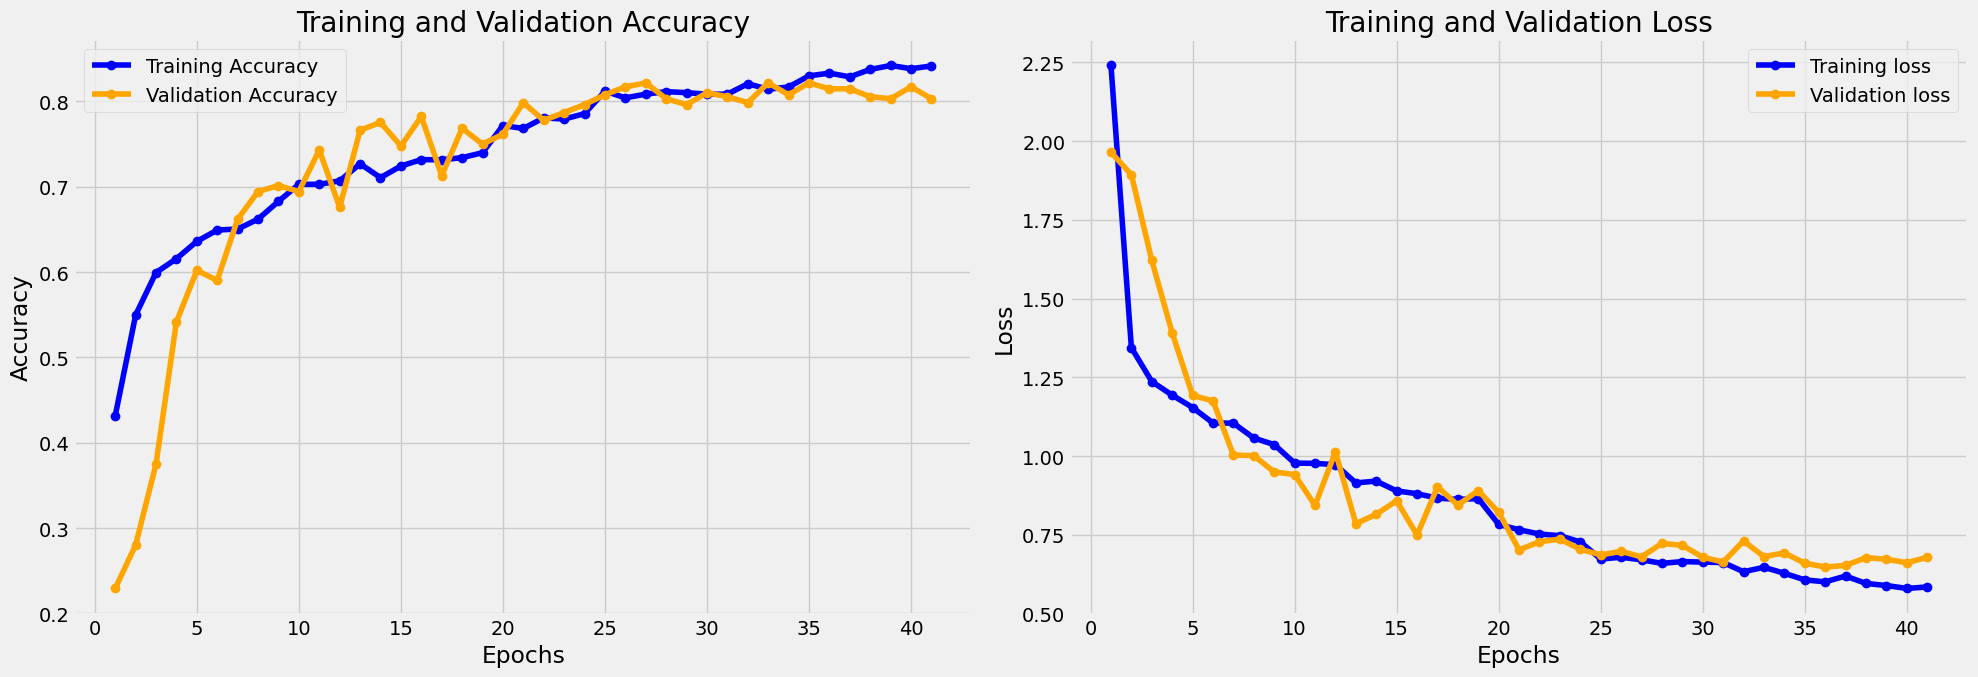

In [ ]:
 model_performance(history)

### Predictions

In [ ]:
preds = CNN_model.predict(test_gen)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step

              precision    recall  f1-score   support



           0       0.88      0.82      0.85        77

           1       0.77      0.81      0.79       105

           2       0.69      0.40      0.50        78

           3       0.77      0.93      0.84        74

           4       0.68      0.80      0.74        98



    accuracy                           0.75       432

   macro avg       0.76      0.75      0.74       432

weighted avg       0.75      0.75      0.74       432




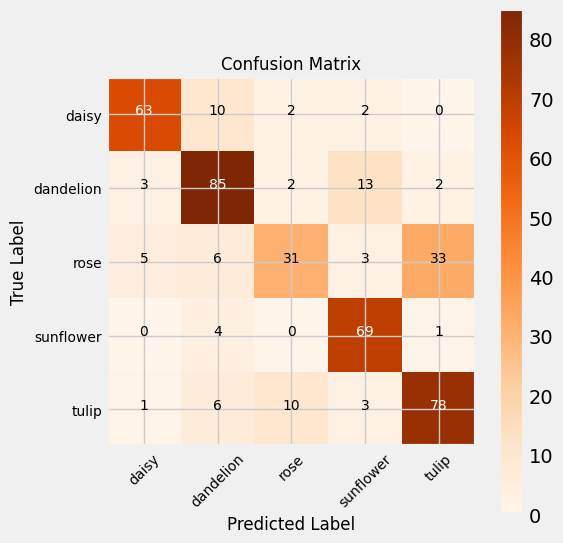

In [ ]:
plot_confusion_matrix(test_gen, predictions)

### Save the Model

In [ ]:
# Save the model in Keras format
CNN_aug.save('CNN_model.keras')

In [ ]:
# Load the model in Keras format
CNN_model = tf.keras.models.load_model('/kaggle/working/CNN_model.keras')

**CNN models:**

- **No Augmentation**: Higher performance but prone to overfitting.
- **With Augmentation**: Improves model robustness, reduces overfitting, providing more reliable results in real-world scenarios.

Next, applying **transfer learning** can potentially enhance performance and generalization further.

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Transfer Learning Models</p>


![](https://d3lkc3n5th01x7.cloudfront.net/wp-content/uploads/2023/07/14001536/Transfer-learning.png)

- Image Credit: [www.leewayhertz.com](https://www.leewayhertz.com/transfer-learning/)
- [Keras 3 API documentation](https://keras.io/api/applications/)



### Preprocessing Before Transfer Learning Models:

Transfer learning models require specific preprocessing steps that vary by model.

- **External Rescaling Required**: **EfficientNet**, **MobileNet**, **InceptionV3**, **VGG**, **ResNet**, and **NASNet**. Use `preprocess_input` to handle rescaling and any additional required adjustments.
- **Internal Rescaling**: **ConvNeXt** (external rescaling is not needed).
- For models like **VGG** and **ResNet**, `preprocess_input` also handles zero-centering and format adjustments (e.g., BGR conversion).
- **Augmentation** is optional but recommended and can be applied externally using tools like `ImageDataGenerator` to improve model generalization.

Preprocessing must be aligned with each model's specific requirements to ensure optimal performance.

## VGG16

**VGG16** is a widely used model with approximately 138 million parameters, achieving 71.5% top-1 accuracy on ImageNet. Its model size is approximately 528 MB.
- **Input size**: Default input size is (224, 224, 3) with `include_top=True`, customizable if `include_top=False`.
- **Channels**: Requires 3-channel RGB images, does not support grayscale.
- **Preprocessing**: The model requires specific preprocessing including rescaling and zero-centering using `preprocess_input`. This function converts RGB images from the range [0, 255] to the format expected by VGG16 (BGR format and zero-centering based on ImageNet mean).

VGG16 is a larger model with high computational demands but provides strong performance in classification tasks. Handling preprocessing such as rescaling and zero-centering externally is needed before using the model.   
https://keras.io/api/applications/vgg/#vgg16-function

###  Preprocessing For VGG (includes zero-centering and BGR conversion):

- For preprocessing, input images will be zero-centered and converted to BGR format (as required by VGG16), including augmentation for training.
- The same zero-centering and BGR conversion will be applied for validation and testing without augmentation.

In [ ]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32                 # Batch size for model training

In [ ]:
# ImageGenerator:

from tensorflow.keras.applications.vgg16 import preprocess_input

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for VGG16
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_vgg = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True)

# Validation and test data for VGG (with rescaling and zero-centering)
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_vgg = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False)

# Load test data
test_gen_vgg = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False)

Found 3453 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.


### VGG16 Base Model:

In [ ]:
# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

In [ ]:
# VGG16 Base Model Architecture

from tensorflow.keras.applications import VGG16

# VGG16 Pre-trained Model
pretrained_model = VGG16(
    input_shape=image_shape,
    include_top=False,
    pooling='avg',
    weights="imagenet")

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer
inputs = keras.Input(shape=image_shape)
x = pretrained_model(inputs)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
VGG16_base = keras.Model(inputs, outputs)

# Compile the model
VGG16_base.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

VGG16_base.summary()

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_vgg16_weights.weights.h5",
    save_best_only=True,            # Save only the best weights
    monitor="val_loss",             # Monitor validation loss
    mode="min",                     # minimize validation loss
    save_weights_only=True)          # Save only the weights,not the model


# Train the model with frozen layers
history = VGG16_base.fit(
    train_gen_vgg,
    validation_data=val_gen_vgg,
    epochs=20,                   # Small epoch for base model
    callbacks=[early_stop, checkpoint_cb])

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,717,253 (56.14 MB)

 Trainable params: 2,565 (10.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 419ms/step - accuracy: 0.2262 - loss: 5.6307 - val_accuracy: 0.2801 - val_loss: 4.7634

Epoch 2/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 409ms/step - accuracy: 0.3246 - loss: 3.4546 - val_accuracy: 0.4144 - val_loss: 3.3748

Epoch 3/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - accuracy: 0.4129 - loss: 2.5559 - val_accuracy: 0.5139 - val_loss: 2.5756

Epoch 4/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 408ms/step - accuracy: 0.5249 - loss: 1.9622 - val_accuracy: 0.5949 - val_loss: 2.0779

Epoch 5/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - accuracy: 0.5757 - loss: 1.6842 - val_accuracy: 0.6343 - val_loss: 1.7912

Epoch 6/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 408ms/step - accuracy: 0.6269 - loss: 1.4413 - val_accuracy: 0.6481 - val_loss: 1.5532

Epoch 7/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 405ms/step - accuracy: 0.6664 - loss: 1.2214 - val_accuracy: 0.6806 - val_loss: 1.3818

Epoch 8/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 407ms/step - accuracy: 0

In [ ]:
test_loss, test_accuracy = VGG16_model.evaluate(test_gen_vgg)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 410ms/step - accuracy: 0.9646 - loss: 0.0933

Test Loss: 0.09025674313306808

Test Accuracy: 0.9678540229797363


### Fine-Tuning

In [ ]:
# Unfreeze the VGG16 model layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
VGG16_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # even lower lr
    metrics=['accuracy'])

VGG16_model.summary()

# Fine-tune the model (with all layers trainable)
history_vgg = VGG16_model.fit(
    train_gen_vgg,
    validation_data=val_gen_vgg,
    epochs=50,                   # Fine-tuning with more epochs
    callbacks=[early_stop, checkpoint_cb])

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,717,253 (56.14 MB)

 Trainable params: 14,717,253 (56.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 92s 598ms/step - accuracy: 0.8006 - loss: 0.6153 - val_accuracy: 0.8750 - val_loss: 0.3457

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 416ms/step - accuracy: 0.8985 - loss: 0.2892 - val_accuracy: 0.8912 - val_loss: 0.3589

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 420ms/step - accuracy: 0.9349 - loss: 0.1899 - val_accuracy: 0.8912 - val_loss: 0.3134

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 420ms/step - accuracy: 0.9589 - loss: 0.1157 - val_accuracy: 0.9028 - val_loss: 0.2874

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 418ms/step - accuracy: 0.9660 - loss: 0.0952 - val_accuracy: 0.8819 - val_loss: 0.3609

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 419ms/step - accuracy: 0.9828 - loss: 0.0607 - val_accuracy: 0.9120 - val_loss: 0.3431

Epoch 7/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 417ms/step - accuracy: 0.9833 - loss: 0.0486 - val_accuracy: 0.9144 - val_loss: 0.3172


### Evaluating the Model

In [ ]:
train_score = VGG16_model.evaluate(train_gen_vgg, verbose=1)
valid_score = VGG16_model.evaluate(val_gen_vgg, verbose=1)
test_score = VGG16_model.evaluate(test_gen_vgg, verbose=1)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 407ms/step - accuracy: 0.9695 - loss: 0.0925

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8788 - loss: 0.3643

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9118 - loss: 0.2920

--------------------

Train Loss:  0.08056464046239853

Train Accuracy:  0.9742252826690674

--------------------

Validation Loss:  0.2874484956264496

Validation Accuracy:  0.9027777910232544

--------------------

Test Loss:  0.3388640582561493

Test Accuracy:  0.9027777910232544

--------------------


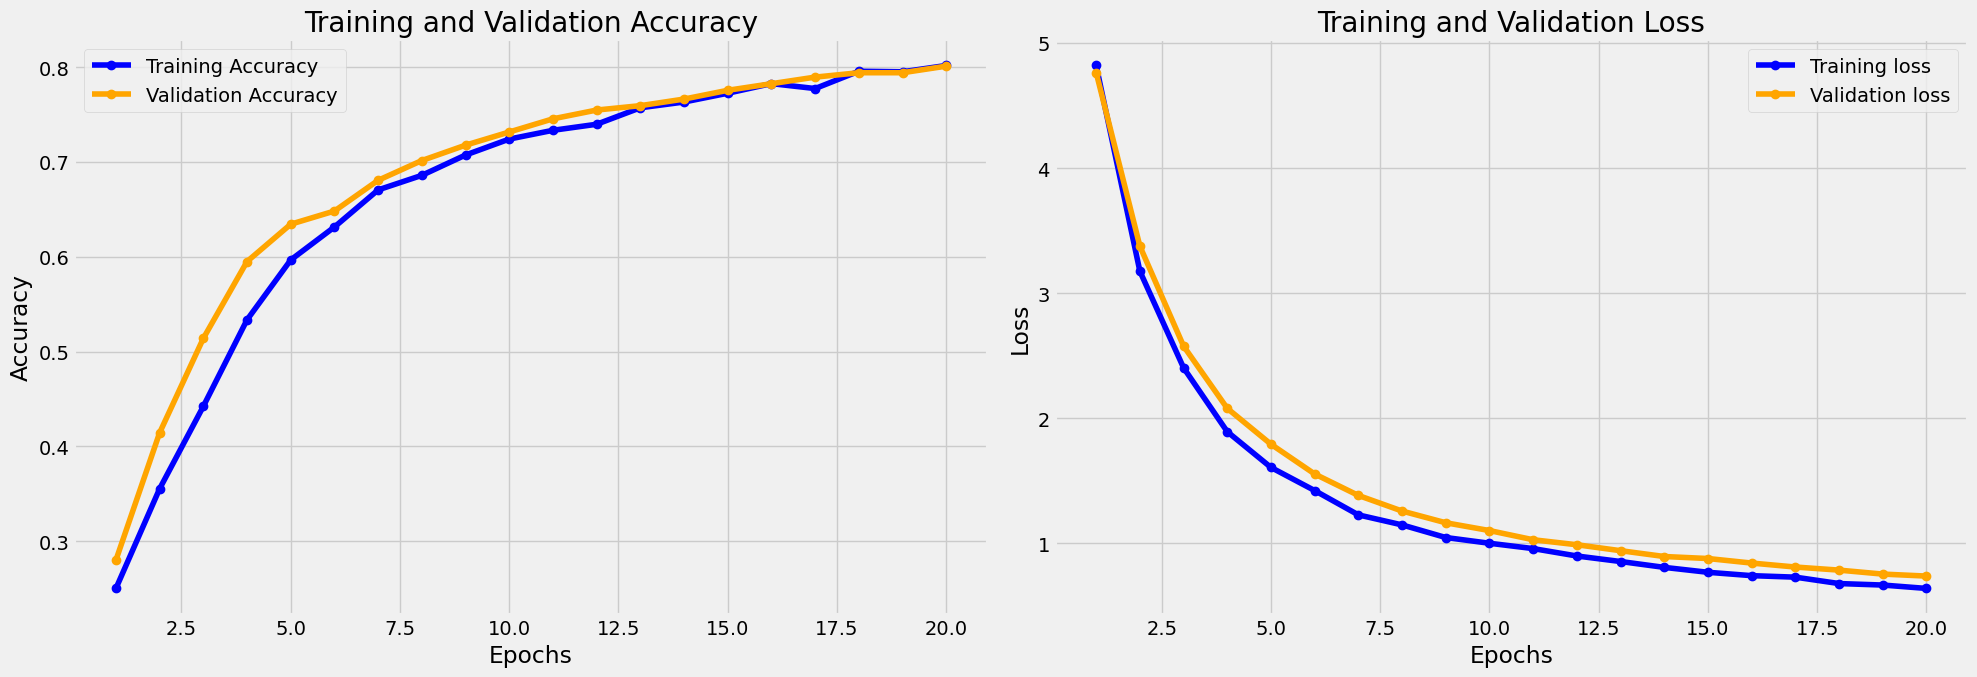

In [ ]:
 model_performance(history_vgg)

### Predictions

In [ ]:
preds = VGG16_model.predict(test_gen_vgg)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_vgg.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step

              precision    recall  f1-score   support



           0       0.97      0.86      0.91        77

           1       0.94      0.95      0.95       105

           2       0.84      0.86      0.85        78

           3       0.91      0.93      0.92        74

           4       0.86      0.90      0.88        98



    accuracy                           0.90       432

   macro avg       0.90      0.90      0.90       432

weighted avg       0.90      0.90      0.90       432




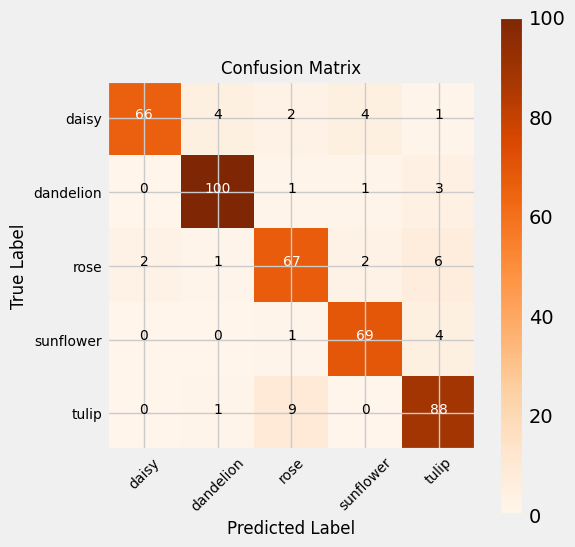

In [ ]:
plot_confusion_matrix(test_gen_vgg, predictions)

### Save the Model

In [ ]:
# Save the model in Keras format
VGG16_model.save('VGG16_model.keras')

In [ ]:
# Load the model in Keras format
VGG16_model = tf.keras.models.load_model('/kaggle/working/VGG16_model.keras')

## InceptionV3

**InceptionV3** is a powerful model with approximately 24 million parameters, achieving 77.9% top-1 accuracy on ImageNet. Its model size is approximately 92 MB.
- **Input size**: Default input size is (299, 299, 3) with `include_top=True`, customizable if `include_top=False`.
- **Channels**: Requires 3-channel RGB images, does not support grayscale.
- **Preprocessing**: InceptionV3 requires specific preprocessing using the `preprocess_input` function, which rescales pixel values from the [0, 255] range to [-1, 1]. This is crucial for the model to perform optimally.

InceptionV3 offers a good balance of performance and computational efficiency, but handling image rescaling externally using the appropriate preprocessing function is required before using the model.   
https://keras.io/api/applications/inceptionv3/

###  Preprocessing For InceptionV3 (includes rescaling to the range [-1, 1]):  

- For preprocessing, input images will be rescaled to the range [-1, 1] as required by InceptionV3, including augmentation for training.  
- The same rescaling to the range [-1, 1] will be applied for validation and testing without augmentation.

In [ ]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

# ImageGenerator:

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for InceptionV3
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_incep = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for InceptionV3 (with rescaling to [-1, 1])
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_incep = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_incep = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 3453 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.


### InceptionV3 Base Model:

In [ ]:
# Callbacks Parameters:
# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [ ]:
# InceptionV3 Base Model Architecture

from tensorflow.keras.applications import InceptionV3

# InceptionV3 Pre-trained Model
pretrained_model = InceptionV3(
    input_shape=image_shape,
    include_top=False,    # Exclude top layer
    pooling='avg',        # Apply average pooling to reduce the output dims
    weights="imagenet"    # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer
inputs = keras.Input(shape=image_shape) #(default input size was 299x299)

# Pass the inputs through the pretrained InceptionV3 model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
InceptionV3_model = keras.Model(inputs, outputs)

# Compile the model
InceptionV3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy'])

InceptionV3_model.summary()

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_inceptionv3_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                    # Save only the best weights
    monitor="val_loss",                     # Monitor validation loss
    mode="min",                             # Minimize validation loss
    save_weights_only=True)                  # Save only the weights, not the entire model


# Train the model with frozen layers
history_incep = InceptionV3_model.fit(
    train_gen_incep,
    validation_data=val_gen_incep,
    epochs=20,                    # Set smaller epochs for initial training
    callbacks=[early_stop, checkpoint_cb,lr_scheduler])

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,813,029 (83.21 MB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 66s 491ms/step - accuracy: 0.5385 - loss: 1.1875 - val_accuracy: 0.8171 - val_loss: 0.5076 - learning_rate: 0.0010

Epoch 2/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 411ms/step - accuracy: 0.8319 - loss: 0.4761 - val_accuracy: 0.8356 - val_loss: 0.4751 - learning_rate: 0.0010

Epoch 3/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 410ms/step - accuracy: 0.8537 - loss: 0.4185 - val_accuracy: 0.8657 - val_loss: 0.4118 - learning_rate: 0.0010

Epoch 4/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 411ms/step - accuracy: 0.8750 - loss: 0.3677 - val_accuracy: 0.8727 - val_loss: 0.3894 - learning_rate: 0.0010

Epoch 5/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 413ms/step - accuracy: 0.8856 - loss: 0.3349 - val_accuracy: 0.8657 - val_loss: 0.3766 - learning_rate: 0.0010

Epoch 6/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 410ms/step - accuracy: 0.8771 - loss: 0.3381 - val_accuracy: 0.8657 - val_loss: 0.3616 - learning_rate: 0.0010

Epoch 7/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - 

In [ ]:
test_loss, test_accuracy = InceptionV3_model.evaluate(test_gen_incep)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.8801 - loss: 0.3509

Test Loss: 0.37969595193862915

Test Accuracy: 0.8796296119689941


### Fine-Tuning

In [ ]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
InceptionV3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # Lower lr
    metrics=['accuracy']
)

InceptionV3_model.summary()

# Fine-tune the model (with all layers trainable)
history_incep = InceptionV3_model.fit(
    train_gen_incep,
    validation_data=val_gen_incep,
    epochs=50,                    # Fine-tuning with more epochs
    callbacks=[early_stop, checkpoint_cb,lr_scheduler])

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,813,029 (83.21 MB)

 Trainable params: 21,778,597 (83.08 MB)

 Non-trainable params: 34,432 (134.50 KB)

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 137s 694ms/step - accuracy: 0.8243 - loss: 0.4871 - val_accuracy: 0.8565 - val_loss: 0.4674 - learning_rate: 1.0000e-04

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 422ms/step - accuracy: 0.9404 - loss: 0.1672 - val_accuracy: 0.9051 - val_loss: 0.3288 - learning_rate: 1.0000e-04

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 419ms/step - accuracy: 0.9574 - loss: 0.1275 - val_accuracy: 0.9190 - val_loss: 0.2979 - learning_rate: 1.0000e-04

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 420ms/step - accuracy: 0.9803 - loss: 0.0636 - val_accuracy: 0.9167 - val_loss: 0.2778 - learning_rate: 1.0000e-04

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 408ms/step - accuracy: 0.9749 - loss: 0.0733 - val_accuracy: 0.9259 - val_loss: 0.3088 - learning_rate: 1.0000e-04

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 409ms/step - accuracy: 0.9776 - loss: 0.0647 - val_accuracy: 0.9213 - val_loss: 0.3136 - learning_rate: 1.0000e-04

Epoch 7/50

108/108 ━━━━━━━━━━━━━

### Evaluating the Model

In [ ]:
train_score = InceptionV3_model.evaluate(train_gen_incep)
valid_score = InceptionV3_model.evaluate(val_gen_incep)
test_score = InceptionV3_model.evaluate(test_gen_incep)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 441ms/step - accuracy: 0.9967 - loss: 0.0095

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9221 - loss: 0.3099

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9288 - loss: 0.2637

--------------------

Train Loss:  0.007646039593964815

Train Accuracy:  0.9976831674575806

--------------------

Validation Loss:  0.2776532471179962

Validation Accuracy:  0.9259259104728699

--------------------

Test Loss:  0.2955770194530487

Test Accuracy:  0.9305555820465088

--------------------


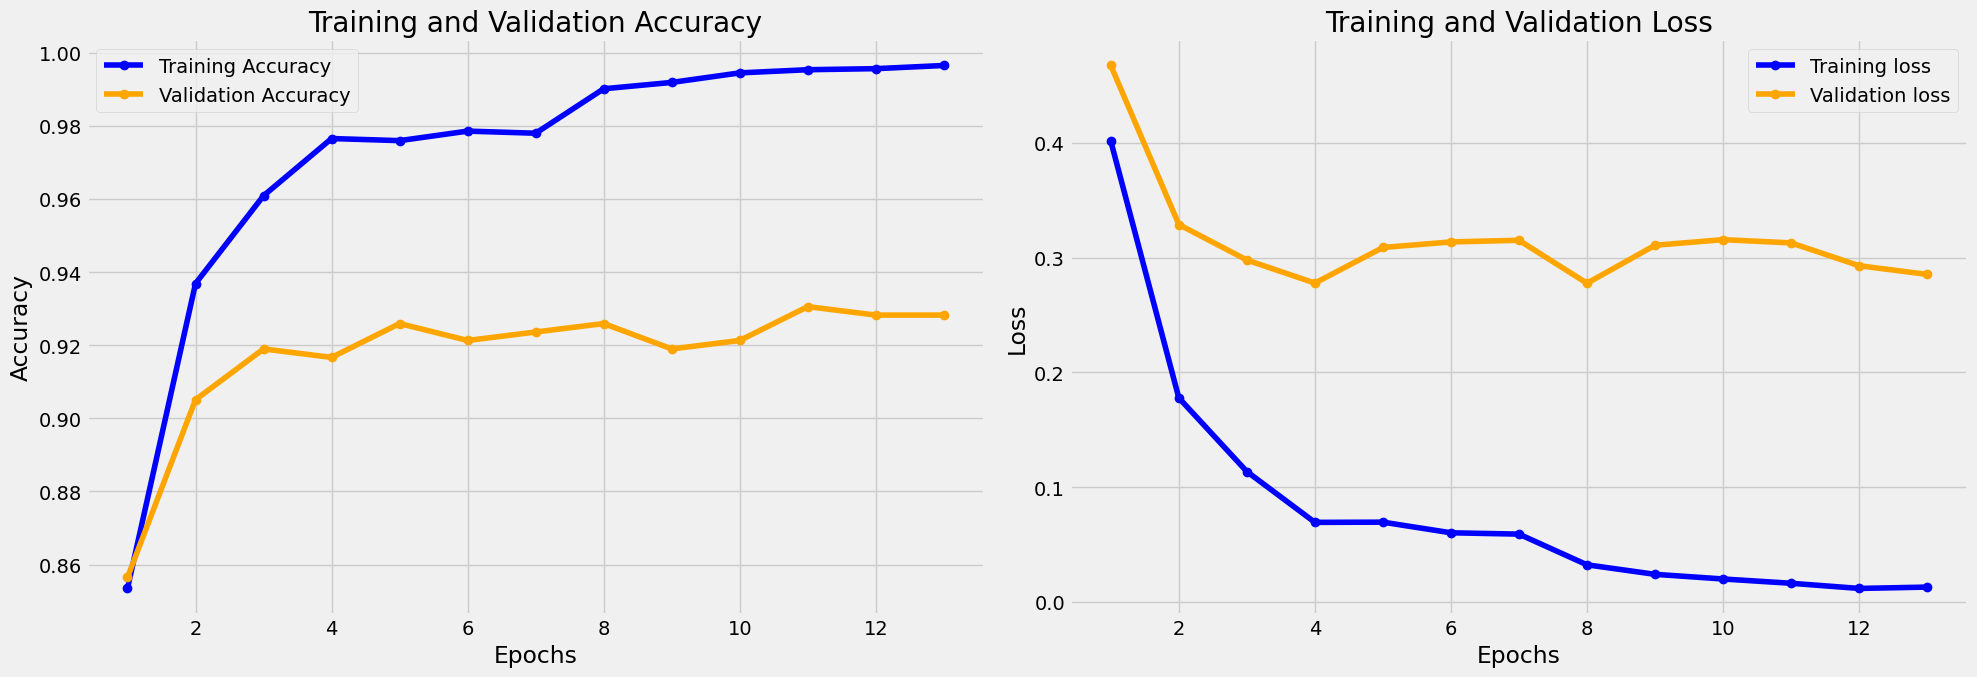

In [ ]:
 model_performance(history_incep)

### Predictions

In [ ]:
preds = InceptionV3_model.predict(test_gen_incep)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_incep.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step

              precision    recall  f1-score   support



           0       0.88      0.97      0.93        77

           1       0.97      0.91      0.94       105

           2       0.91      0.90      0.90        78

           3       0.92      0.96      0.94        74

           4       0.96      0.92      0.94        98



    accuracy                           0.93       432

   macro avg       0.93      0.93      0.93       432

weighted avg       0.93      0.93      0.93       432




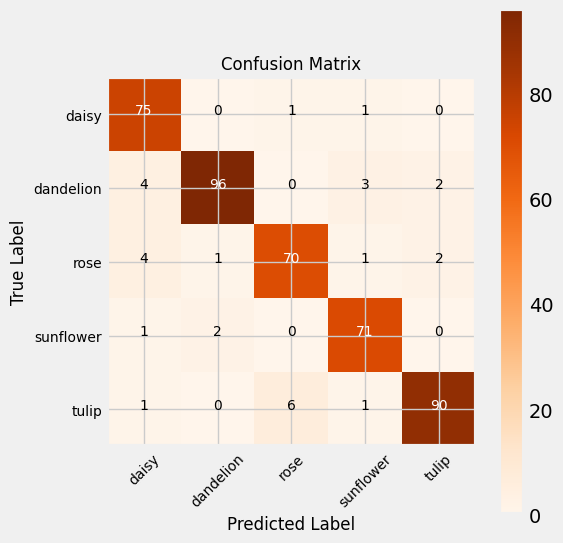

In [ ]:
plot_confusion_matrix(test_gen_incep, predictions)

### Save the Model

In [ ]:
# Save the model in Keras format
InceptionV3_model.save('InceptionV3_model.keras')

In [ ]:
# Load the model in Keras format
InceptionV3_model = tf.keras.models.load_model('/kaggle/working/InceptionV3_model.keras')

## NASNetMobile

**NASNetMobile** is an efficient model with approximately 5.3 million parameters, achieving 74.4% top-1 accuracy on ImageNet. Its model size is approximately 23 MB.
- **Input size**: Default input size is (224, 224, 3) with `include_top=True`, customizable if `include_top=False`.
- **Channels**: Requires 3-channel RGB images, does not support grayscale.
- **Preprocessing**: NASNetMobile requires external preprocessing using the `preprocess_input` function, which rescales pixel values from the [0, 255] range to the [0, 1] range. This rescaling is crucial for the model to function correctly.

NASNetMobile is designed for efficiency, offering a balance between accuracy and speed. Handling image rescaling externally using the appropriate preprocessing function is required before using the model.     
https://keras.io/api/applications/nasnet/#nasnetmobile-function

### Preprocessing For NASNetMobile (includes rescaling to the range [0, 1]):

- For preprocessing, input images will be rescaled to the range [0, 1] as required by NASNetMobile, including augmentation for training.
- The same rescaling to the range [0, 1] will be applied for validation and testing without augmentation.

In [22]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [23]:
from tensorflow.keras.applications.nasnet import preprocess_input

# ImageGenerator

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for NASNetMobile
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_nasnet = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,   # Resize images to target size (default 224x224 for NASNetMobile)
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for NASNetMobile (with rescaling to [0, 1])
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_nasnet = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_nasnet = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 3453 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.


### NasNetMobile Base Model:

In [24]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [ ]:
from tensorflow.keras.applications import NASNetMobile

# NASNetMobile Pre-trained Model
pretrained_model = NASNetMobile(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (NASNetMobile default input size is 224x224)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained NASNetMobile model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
NASNetMobile_model = keras.Model(inputs, outputs)

# Compile the model
NASNetMobile_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

NASNetMobile_model.summary()

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_nasnetmobile_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                     # Save only the best weights
    monitor="val_loss",                      # Monitor validation loss
    mode="min",                              # Minimize validation loss
    save_weights_only=True)                  # Save only the weights, not the entire model


# Train the model with frozen layers
history_nasnet = NASNetMobile_model.fit(
    train_gen_nasnet,
    validation_data=val_gen_nasnet,
    epochs=20,                     # Set smaller epochs
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ nasnet_mobile (Functional)           │ (None, 1056)                │       4,269,716 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │           5,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,001 (16.31 MB)

 Trainable params: 5,285 (20.64 KB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 104s 675ms/step - accuracy: 0.3227 - loss: 1.5348 - val_accuracy: 0.6042 - val_loss: 1.1796 - learning_rate: 1.0000e-04

Epoch 2/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 417ms/step - accuracy: 0.6221 - loss: 1.1265 - val_accuracy: 0.6921 - val_loss: 0.9553 - learning_rate: 1.0000e-04

Epoch 3/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 421ms/step - accuracy: 0.6933 - loss: 0.9541 - val_accuracy: 0.7338 - val_loss: 0.8337 - learning_rate: 1.0000e-04

Epoch 4/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 417ms/step - accuracy: 0.7251 - loss: 0.8379 - val_accuracy: 0.7616 - val_loss: 0.7588 - learning_rate: 1.0000e-04

Epoch 5/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 414ms/step - accuracy: 0.7375 - loss: 0.7746 - val_accuracy: 0.7685 - val_loss: 0.7051 - learning_rate: 1.0000e-04

Epoch 6/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 419ms/step - accuracy: 0.7516 - loss: 0.7307 - val_accuracy: 0.7778 - val_loss: 0.6657 - learning_rate: 1.0000e-04

Epoch 7/20

108/108 ━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy = NASNetMobile_model.evaluate(test_gen_nasnet)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8315 - loss: 0.4920

Test Loss: 0.5172911882400513

Test Accuracy: 0.8287037014961243


### Fine-Tuning

In [ ]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
NASNetMobile_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])

NASNetMobile_model.summary()

# Fine-tune the model (with all layers trainable)
history_nasnet = NASNetMobile_model.fit(
    train_gen_nasnet,
    validation_data=val_gen_nasnet,
    epochs=50,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ nasnet_mobile (Functional)           │ (None, 1056)                │       4,269,716 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │           5,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,001 (16.31 MB)

 Trainable params: 4,238,263 (16.17 MB)

 Non-trainable params: 36,738 (143.51 KB)

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.7398 - loss: 0.7165 - val_accuracy: 0.8681 - val_loss: 0.4366 - learning_rate: 1.0000e-05

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 434ms/step - accuracy: 0.8345 - loss: 0.5070 - val_accuracy: 0.8634 - val_loss: 0.4185 - learning_rate: 1.0000e-05

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 435ms/step - accuracy: 0.8615 - loss: 0.4161 - val_accuracy: 0.8704 - val_loss: 0.4014 - learning_rate: 1.0000e-05

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 435ms/step - accuracy: 0.8643 - loss: 0.4021 - val_accuracy: 0.8727 - val_loss: 0.3865 - learning_rate: 1.0000e-05

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 434ms/step - accuracy: 0.8874 - loss: 0.3334 - val_accuracy: 0.8796 - val_loss: 0.3694 - learning_rate: 1.0000e-05

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 435ms/step - accuracy: 0.9036 - loss: 0.3031 - val_accuracy: 0.8912 - val_loss: 0.3480 - learning_rate: 1.0000e-05

Epoch 7/50

108/108 ━━━━━━━━━━━━━━━━

### Evaluating the Model

In [ ]:
train_score = NASNetMobile_model.evaluate(train_gen_nasnet)
valid_score = NASNetMobile_model.evaluate(val_gen_nasnet)
test_score = NASNetMobile_model.evaluate(test_gen_nasnet)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 483ms/step - accuracy: 0.9682 - loss: 0.1122

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9225 - loss: 0.2657

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9187 - loss: 0.2448

--------------------

Train Loss:  0.11114030331373215

Train Accuracy:  0.9678540229797363

--------------------

Validation Loss:  0.2587168514728546

Validation Accuracy:  0.9236111044883728

--------------------

Test Loss:  0.25471729040145874

Test Accuracy:  0.9282407164573669

--------------------


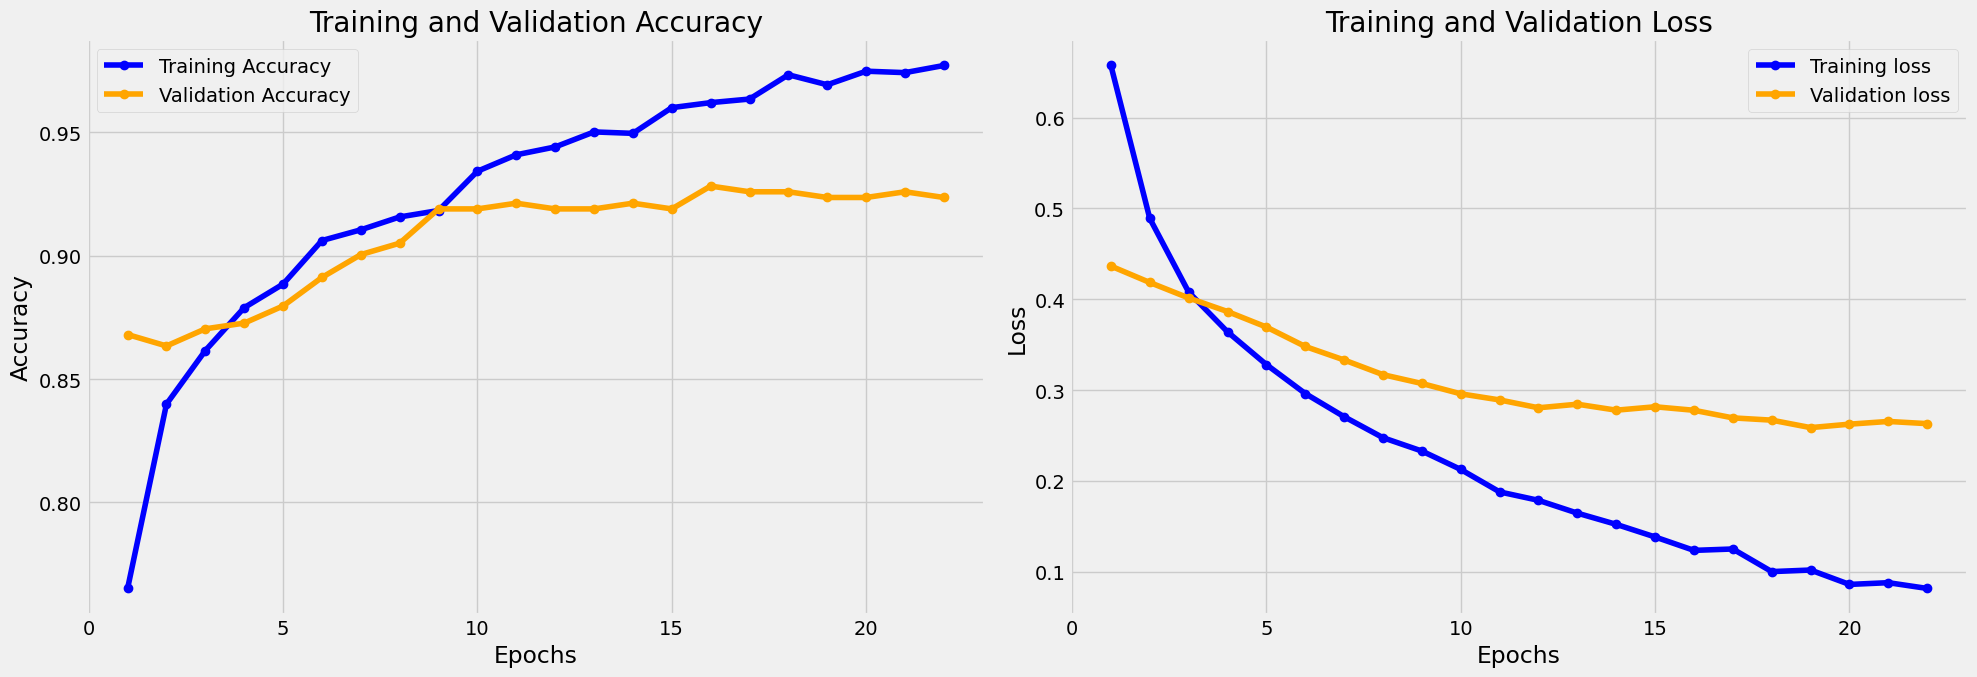

In [ ]:
 model_performance(history_nasnet)

### Predictions

In [ ]:
preds = NASNetMobile_model.predict(test_gen_nasnet)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_nasnet.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step

              precision    recall  f1-score   support



           0       0.96      0.95      0.95        77

           1       0.94      0.97      0.96       105

           2       0.89      0.86      0.88        78

           3       0.91      0.97      0.94        74

           4       0.93      0.89      0.91        98



    accuracy                           0.93       432

   macro avg       0.93      0.93      0.93       432

weighted avg       0.93      0.93      0.93       432




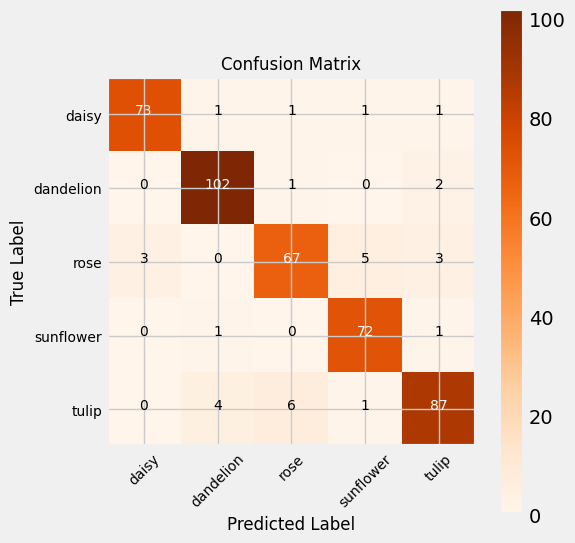

In [ ]:
plot_confusion_matrix(test_gen_nasnet, predictions)

### Save the Model

In [ ]:
# Save the model in Keras format
NASNetMobile_model.save('NasNetMobile_model.keras')

In [ ]:
# Load the model in Keras format
NASNetMobile_model = tf.keras.models.load_model('/kaggle/working/NasNetMobile_model.keras')

## EfficientNetB3

**EfficientNetB3** is a compact model with 12 million parameters, 81.6% accuracy on ImageNet, and a size of approximately 47 MB. It processes 1068 images per second.
- **Input size**: Default input size is (300, 300, 3) with `include_top=True`, customizable if `include_top=False`.
- **Channels**: Requires 3-channel RGB images, does not support grayscale.
- **Preprocessing**: No internal rescaling, so external preprocessing is required.   
(https://keras.io/api/applications/efficientnet/#efficientnetb3-function)

### Preprocessing For EfficientNetB3 (includes rescaling to the range [0, 255]):

- For preprocessing, input images will be rescaled to the range [0, 255] as required by EfficientNetB3, including augmentation for training.
- The same rescaling to the range [0, 255] will be applied for validation and testing without augmentation.

In [ ]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

# ImageGenerator

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for EfficientNetB3
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_effnet = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for EfficientNetB3 (with rescaling)
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_effnet = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_effnet = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 3453 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.


### EfficientNetB3 Base Model:

In [ ]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [ ]:
from tensorflow.keras.applications import EfficientNetB3


# EfficientNetB3 Pre-trained Model
pretrained_model = EfficientNetB3(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (EfficientNetB3 default input size is 300x300)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained EfficientNetB3 model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
EfficientNetB3_model = keras.Model(inputs, outputs)

# Compile the model
EfficientNetB3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_efficientnetb3_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                       # Save only the best weights
    monitor="val_loss",                        # Monitor validation loss
    mode="min",                                # Minimize validation loss
    save_weights_only=True)                    # Save only the weights, not the entire model


EfficientNetB3_model.summary()

# Train the model with frozen layers
history_effnet = EfficientNetB3_model.fit(
    train_gen_effnet,
    validation_data=val_gen_effnet,
    epochs=10,
    callbacks=[early_stop, checkpoint_cb])


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │           7,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,791,220 (41.17 MB)

 Trainable params: 7,685 (30.02 KB)

 Non-trainable params: 10,783,535 (41.14 MB)

Epoch 1/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 117s 744ms/step - accuracy: 0.2994 - loss: 1.5637 - val_accuracy: 0.6690 - val_loss: 1.1092

Epoch 2/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - accuracy: 0.6387 - loss: 1.1080 - val_accuracy: 0.7639 - val_loss: 0.8398

Epoch 3/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - accuracy: 0.7423 - loss: 0.8735 - val_accuracy: 0.8171 - val_loss: 0.6908

Epoch 4/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 402ms/step - accuracy: 0.7810 - loss: 0.7518 - val_accuracy: 0.8519 - val_loss: 0.5984

Epoch 5/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 407ms/step - accuracy: 0.7890 - loss: 0.6891 - val_accuracy: 0.8634 - val_loss: 0.5352

Epoch 6/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 407ms/step - accuracy: 0.8100 - loss: 0.6201 - val_accuracy: 0.8704 - val_loss: 0.4899

Epoch 7/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 402ms/step - accuracy: 0.8278 - loss: 0.5830 - val_accuracy: 0.8773 - val_loss: 0.4555

Epoch 8/10

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - accuracy: 

In [ ]:
test_loss, test_accuracy = EfficientNetB3_model.evaluate(test_gen_effnet)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.8726 - loss: 0.3931

Test Loss: 0.42665785551071167

Test Accuracy: 0.8680555820465088


### Fine-Tuning

In [ ]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
EfficientNetB3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])

EfficientNetB3_model.summary()

# Fine-tune the model (with all layers trainable)
history_effnet = EfficientNetB3_model.fit(
    train_gen_effnet,
    validation_data=val_gen_effnet,
    epochs=50,                    #  more epochs
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │           7,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,791,220 (41.17 MB)

 Trainable params: 10,703,917 (40.83 MB)

 Non-trainable params: 87,303 (341.03 KB)

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.6938 - loss: 0.9149 - val_accuracy: 0.8912 - val_loss: 0.4217

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 415ms/step - accuracy: 0.8168 - loss: 0.6353 - val_accuracy: 0.8866 - val_loss: 0.4080

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 424ms/step - accuracy: 0.8422 - loss: 0.5255 - val_accuracy: 0.8981 - val_loss: 0.3730

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 421ms/step - accuracy: 0.8710 - loss: 0.4178 - val_accuracy: 0.9005 - val_loss: 0.3342

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 428ms/step - accuracy: 0.8948 - loss: 0.3749 - val_accuracy: 0.9051 - val_loss: 0.3074

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 430ms/step - accuracy: 0.9080 - loss: 0.3144 - val_accuracy: 0.9144 - val_loss: 0.2842

Epoch 7/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 426ms/step - accuracy: 0.9177 - loss: 0.2706 - val_accuracy: 0.9213 - val_loss: 0.2698

Epoch 8/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 423ms/step - accuracy: 0.9

### Evaluating the Model

In [ ]:
train_score = EfficientNetB3_model.evaluate(train_gen_effnet)
valid_score = EfficientNetB3_model.evaluate(val_gen_effnet)
test_score = EfficientNetB3_model.evaluate(test_gen_effnet)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 459ms/step - accuracy: 0.9992 - loss: 0.0226

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9475 - loss: 0.1780

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.9245 - loss: 0.2166

--------------------

Train Loss:  0.023207945749163628

Train Accuracy:  0.9985519647598267

--------------------

Validation Loss:  0.1955259144306183

Validation Accuracy:  0.9490740895271301

--------------------

Test Loss:  0.2359444499015808

Test Accuracy:  0.9143518805503845

--------------------


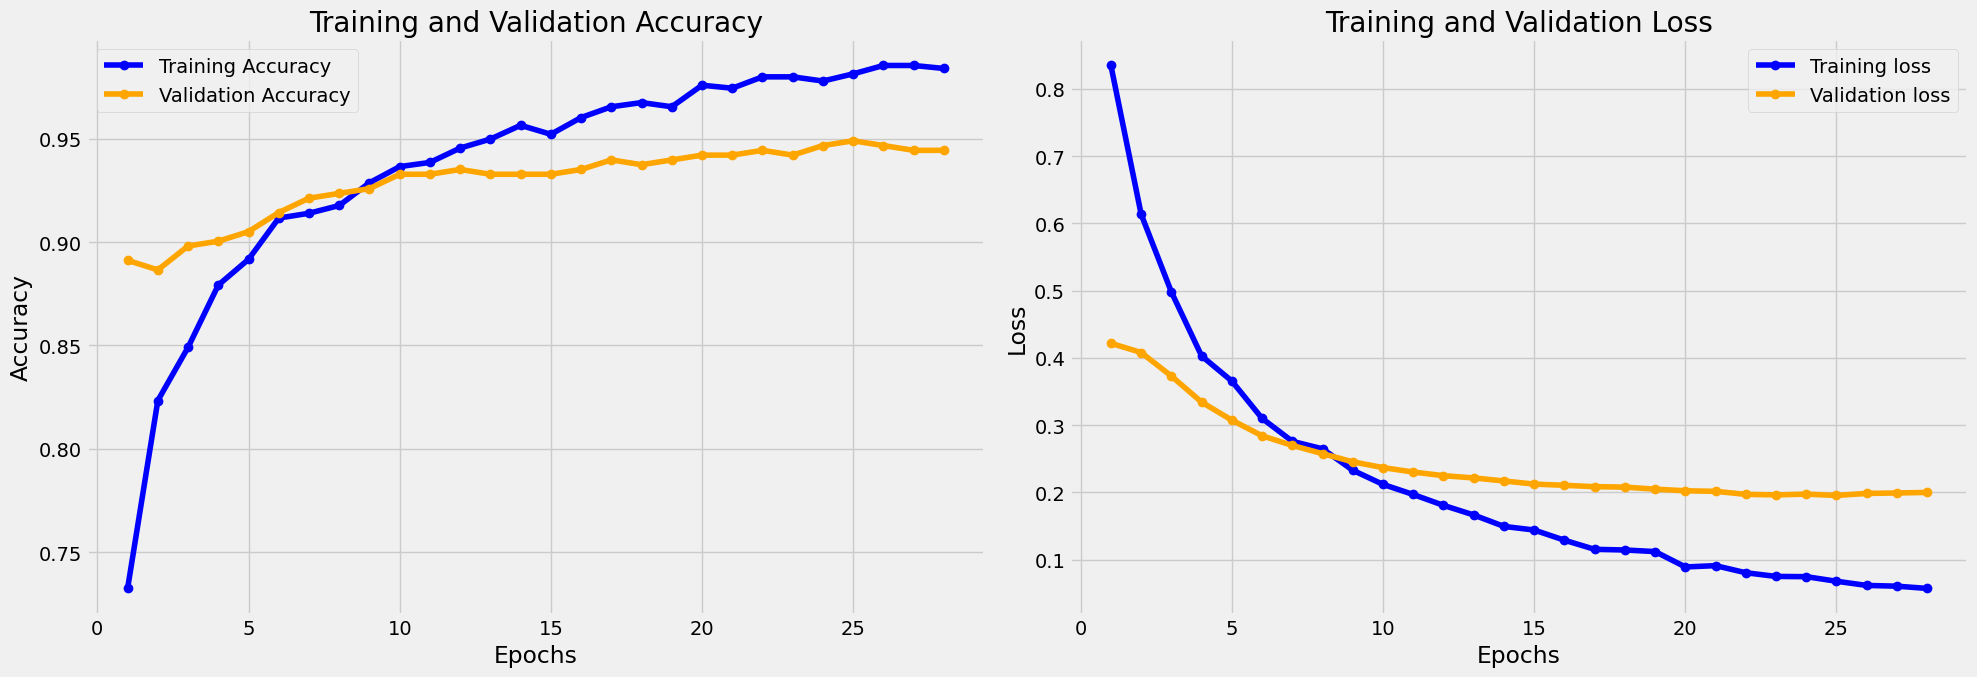

In [ ]:
 model_performance(history_effnet)

### Predictions

In [ ]:
preds = EfficientNetB3_model.predict(test_gen_effnet)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_effnet.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 769ms/step

              precision    recall  f1-score   support



           0       0.94      0.95      0.94        77

           1       0.93      0.95      0.94       105

           2       0.85      0.90      0.88        78

           3       0.97      0.93      0.95        74

           4       0.89      0.85      0.87        98



    accuracy                           0.91       432

   macro avg       0.92      0.92      0.92       432

weighted avg       0.91      0.91      0.91       432




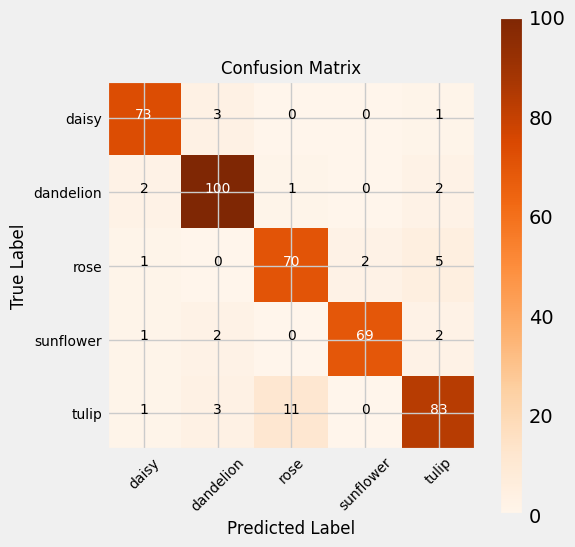

In [ ]:
plot_confusion_matrix(test_gen_effnet, predictions)

### Save the Model

In [ ]:
# Save the model in Keras format
EfficientNetB3_model.save('EfficientNetB3_model.keras')

In [ ]:
# Load the model in Keras format
EfficientNetB3_model = tf.keras.models.load_model('/kaggle/working/EfficientNetB3_model.keras')

## EfficientNetV2-S

**EfficientNetV2-S** is a compact model with approximately 22 million parameters, achieving high accuracy on ImageNet. Its model size is approximately 88 MB, offers high accuracy with efficient computational performance.

- **Input size**: Default input size is (384, 384, 3) with `include_top=True`, customizable if `include_top=False`.
- **Channels**: Requires 3-channel RGB images, does not support grayscale.
- **Preprocessing**: Internal rescaling is applied*, so no external rescaling is needed.   
https://keras.io/api/applications/efficientnet_v2/#efficientnetv2s-function

### Preprocessing For EfficientNetV2-S (No external rescaling needed):

- **EfficientNetV2-S** handles image rescaling internally, so there is no need to apply external rescaling before using the model.
- Augmentation will be applied for training data, but no external rescaling is needed.
- Validation and testing data will be loaded using **ImageDataGenerator** without augmentation, and no additional rescaling is required, as the model will handle this internally.

In [ ]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training data with augmentation
# (No rescaling, handled internally by the model)
train_aug_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_unscaled = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for EfficientNetV2-S (No external rescaling)
val_test_generator = ImageDataGenerator()

# Load validation data
val_gen_unscaled = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_unscaled = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 3453 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.

Found 432 validated image filenames belonging to 5 classes.


### Base Model:

In [ ]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [ ]:
from tensorflow.keras.applications import EfficientNetV2S

# EfficientNetV2-S Pre-trained Model
pretrained_model = EfficientNetV2S(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (EfficientNetV2-S default input size is 384x384)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained EfficientNetV2-S model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
EfficientNetV2S_model = keras.Model(inputs, outputs)

# Compile the model
EfficientNetV2S_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

EfficientNetV2S_model.summary()

# Callbacks:  Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_efficientnetv2s_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                        # Save only the best weights
    monitor="val_loss",                         # Monitor validation loss
    mode="min",                                 # Minimize validation loss
    save_weights_only=True)                     # Save only the weights, not the entire model



# Train the model with frozen layers
history_effnetv2 = EfficientNetV2S_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=20,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])


82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 1280)                │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,337,765 (77.58 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 20,331,360 (77.56 MB)

Epoch 1/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 134s 799ms/step - accuracy: 0.3059 - loss: 1.5467 - val_accuracy: 0.6088 - val_loss: 1.1778 - learning_rate: 1.0000e-04

Epoch 2/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 413ms/step - accuracy: 0.6596 - loss: 1.1241 - val_accuracy: 0.7153 - val_loss: 0.9024 - learning_rate: 1.0000e-04

Epoch 3/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 415ms/step - accuracy: 0.7435 - loss: 0.8878 - val_accuracy: 0.7616 - val_loss: 0.7510 - learning_rate: 1.0000e-04

Epoch 4/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 412ms/step - accuracy: 0.7550 - loss: 0.7851 - val_accuracy: 0.8009 - val_loss: 0.6537 - learning_rate: 1.0000e-04

Epoch 5/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 408ms/step - accuracy: 0.8048 - loss: 0.6849 - val_accuracy: 0.8125 - val_loss: 0.5892 - learning_rate: 1.0000e-04

Epoch 6/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 409ms/step - accuracy: 0.8138 - loss: 0.6191 - val_accuracy: 0.8241 - val_loss: 0.5409 - learning_rate: 1.0000e-04

Epoch 7/20

108/108 ━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy = EfficientNetV2S_model.evaluate(test_gen_unscaled)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.8762 - loss: 0.3459

Test Loss: 0.3829454779624939

Test Accuracy: 0.8703703880310059


### Fine-Tuning

In [ ]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
EfficientNetV2S_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])


EfficientNetV2S_model.summary()

# Fine-tune the model (with all layers trainable)
history_effnetv2 = EfficientNetV2S_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=50,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 1280)                │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,337,765 (77.58 MB)

 Trainable params: 20,183,893 (77.00 MB)

 Non-trainable params: 153,872 (601.06 KB)

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.8297 - loss: 0.5461 - val_accuracy: 0.8634 - val_loss: 0.3957 - learning_rate: 1.0000e-05

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 411ms/step - accuracy: 0.8623 - loss: 0.4323 - val_accuracy: 0.8819 - val_loss: 0.3335 - learning_rate: 1.0000e-05

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 425ms/step - accuracy: 0.9043 - loss: 0.3338 - val_accuracy: 0.8912 - val_loss: 0.3030 - learning_rate: 1.0000e-05

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 426ms/step - accuracy: 0.9039 - loss: 0.2985 - val_accuracy: 0.9097 - val_loss: 0.2702 - learning_rate: 1.0000e-05

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 422ms/step - accuracy: 0.9298 - loss: 0.2394 - val_accuracy: 0.9167 - val_loss: 0.2464 - learning_rate: 1.0000e-05

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 424ms/step - accuracy: 0.9202 - loss: 0.2340 - val_accuracy: 0.9167 - val_loss: 0.2383 - learning_rate: 1.0000e-05

Epoch 7/50

108/108 ━━━━━━━━━━━━━━━━

### Evaluating the Model

In [ ]:
train_score = EfficientNetV2S_model.evaluate(train_gen_unscaled)
valid_score = EfficientNetV2S_model.evaluate(val_gen_unscaled)
test_score = EfficientNetV2S_model.evaluate(test_gen_unscaled)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 453ms/step - accuracy: 0.9993 - loss: 0.0209

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9352 - loss: 0.1617

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9217 - loss: 0.2178

--------------------

Train Loss:  0.019305361434817314

Train Accuracy:  0.9991312026977539

--------------------

Validation Loss:  0.17053402960300446

Validation Accuracy:  0.9351851940155029

--------------------

Test Loss:  0.23219279944896698

Test Accuracy:  0.9236111044883728

--------------------


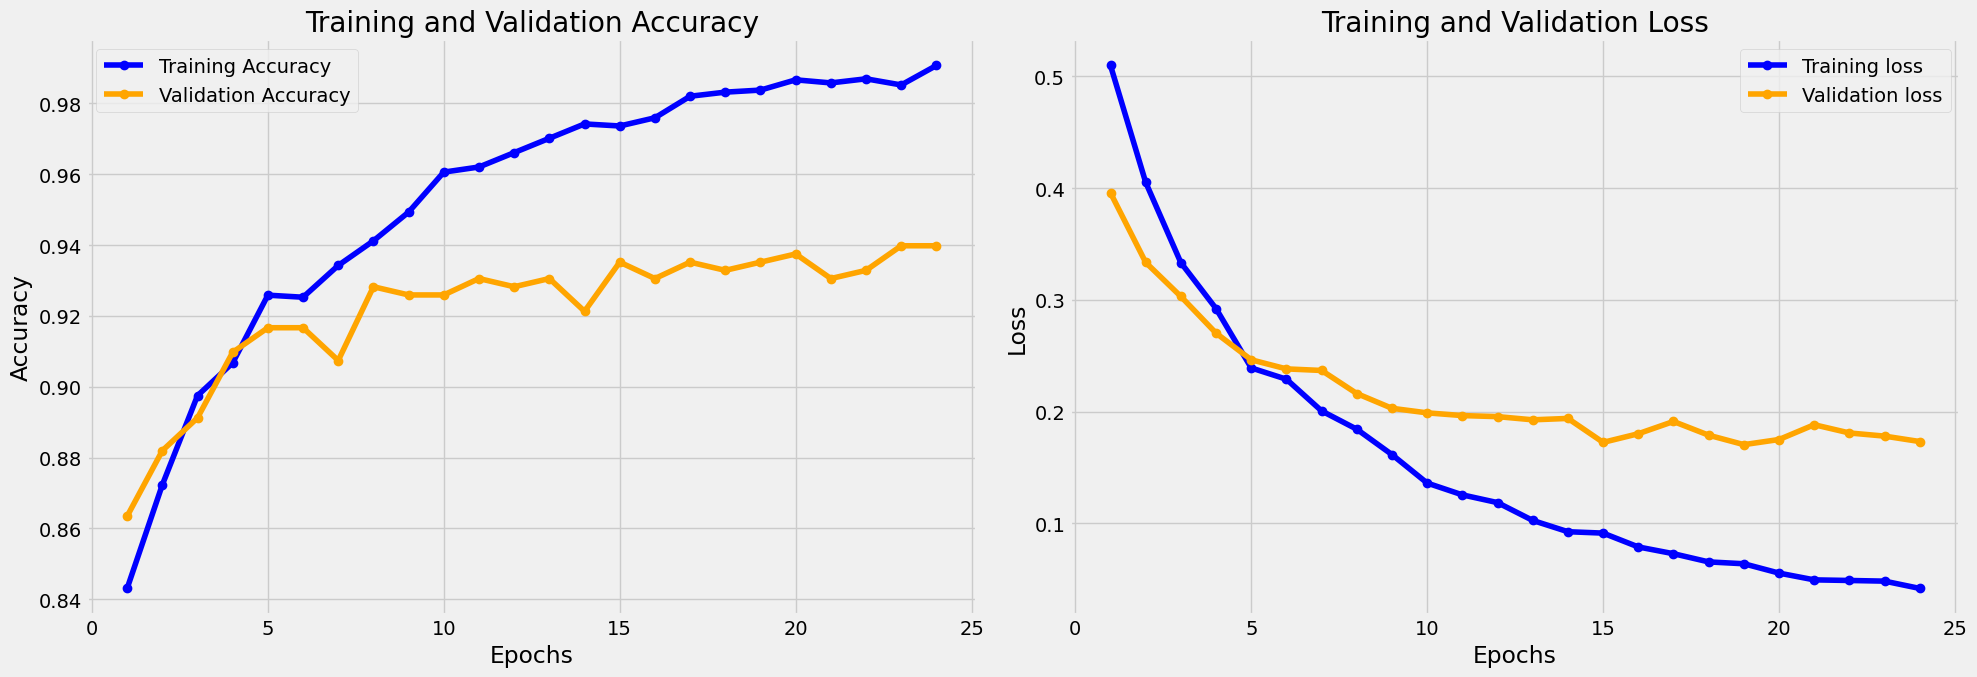

In [ ]:
 model_performance(history_effnetv2)

### Predictions

In [ ]:
preds = EfficientNetV2S_model.predict(test_gen_unscaled)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_unscaled.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 868ms/step

              precision    recall  f1-score   support



           0       0.96      0.96      0.96        77

           1       0.95      0.94      0.95       105

           2       0.83      0.90      0.86        78

           3       0.91      0.97      0.94        74

           4       0.95      0.86      0.90        98



    accuracy                           0.92       432

   macro avg       0.92      0.93      0.92       432

weighted avg       0.93      0.92      0.92       432




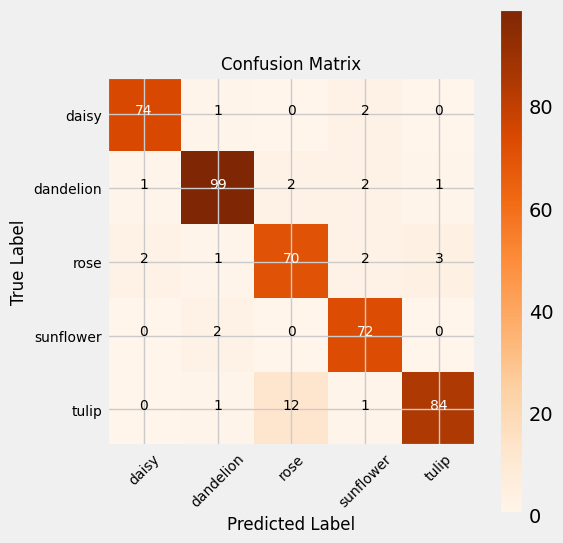

In [ ]:
plot_confusion_matrix(test_gen_unscaled, predictions)

### Save the Model

In [ ]:
# Save the model in Keras format
EfficientNetV2S_model.save('EfficientNetV2S_model.keras')

In [ ]:
# Load the model in Keras format
EfficientNetV2S_model = tf.keras.models.load_model('/kaggle/working/EfficientNetV2S_model.keras')

## ConvNeXtTiny Model

**ConvNeXtTiny** is a compact model with approximately 28 million parameters, designed to offer high accuracy while maintaining efficiency. Its model size is approximately 102 MB.
- **Input size**: Default input size is (224, 224, 3) with `include_top=True`, customizable if `include_top=False`.
- **Channels**: Requires 3-channel RGB images, does not support grayscale.
- **Preprocessing**: Rescaling is handled internally, so external rescaling is not needed.

ConvNeXtTiny offers high accuracy with efficient computational performance, and there is no need to handle image rescaling externally before using the model.

**Note**: For preprocessing, augmentation can be applied for training, but no external rescaling is required for training, validation, or testing data.

https://keras.io/api/applications/convnext/#convnexttiny-function

### Preprocessing For ConvNeXt: (No external rescaling needed)

**Note**: The data used in this step includes augmentation but is not rescaled, as rescaling is handled internally by the model.

In [ ]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [ ]:
from tensorflow.keras.applications import ConvNeXtTiny

# ConvNeXtTiny Pre-trained Model
pretrained_model = ConvNeXtTiny(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (ConvNeXtTiny default input size is 224x224)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained ConvNeXtTiny model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
ConvNeXtTiny_model = keras.Model(inputs, outputs)

# Compile the model
ConvNeXtTiny_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])


ConvNeXtTiny_model.summary()

# Callbacks: Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_convnexttiny_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                     # Save only the best weights
    monitor="val_loss",                      # Monitor validation loss
    mode="min",                              # Minimize validation loss
    save_weights_only=True)                  # Save only the weights, not the entire model


# Train the model with frozen layers
history_cnv = ConvNeXtTiny_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=20,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])


111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_tiny (Functional)           │ (None, 768)                 │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │           3,845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,823,973 (106.14 MB)

 Trainable params: 3,845 (15.02 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

Epoch 1/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 89s 611ms/step - accuracy: 0.2158 - loss: 2.1226 - val_accuracy: 0.4792 - val_loss: 1.3281 - learning_rate: 1.0000e-04

Epoch 2/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - accuracy: 0.5129 - loss: 1.2453 - val_accuracy: 0.6366 - val_loss: 0.9608 - learning_rate: 1.0000e-04

Epoch 3/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 403ms/step - accuracy: 0.6478 - loss: 0.9439 - val_accuracy: 0.7083 - val_loss: 0.7718 - learning_rate: 1.0000e-04

Epoch 4/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 403ms/step - accuracy: 0.7125 - loss: 0.7995 - val_accuracy: 0.7431 - val_loss: 0.6605 - learning_rate: 1.0000e-04

Epoch 5/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 403ms/step - accuracy: 0.7679 - loss: 0.6569 - val_accuracy: 0.7755 - val_loss: 0.5889 - learning_rate: 1.0000e-04

Epoch 6/20

108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 402ms/step - accuracy: 0.7682 - loss: 0.6361 - val_accuracy: 0.7940 - val_loss: 0.5375 - learning_rate: 1.0000e-04

Epoch 7/20

108/108 ━━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy = ConvNeXtTiny_model.evaluate(test_gen_unscaled)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8964 - loss: 0.3061

Test Loss: 0.3388229310512543

Test Accuracy: 0.8888888955116272


### Fine-Tuning

In [ ]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
ConvNeXtTiny_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])

ConvNeXtTiny_model.summary()

# Fine-tune the model (with all layers trainable)
history_cnv = ConvNeXtTiny_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=50,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_tiny (Functional)           │ (None, 768)                 │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │           3,845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,823,973 (106.14 MB)

 Trainable params: 27,823,973 (106.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 134s 698ms/step - accuracy: 0.9095 - loss: 0.2862 - val_accuracy: 0.9028 - val_loss: 0.2667 - learning_rate: 1.0000e-05

Epoch 2/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 422ms/step - accuracy: 0.9433 - loss: 0.1959 - val_accuracy: 0.9190 - val_loss: 0.2295 - learning_rate: 1.0000e-05

Epoch 3/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 417ms/step - accuracy: 0.9549 - loss: 0.1642 - val_accuracy: 0.9282 - val_loss: 0.2116 - learning_rate: 1.0000e-05

Epoch 4/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 416ms/step - accuracy: 0.9596 - loss: 0.1361 - val_accuracy: 0.9259 - val_loss: 0.1946 - learning_rate: 1.0000e-05

Epoch 5/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.9683 - loss: 0.1102 - val_accuracy: 0.9259 - val_loss: 0.1919 - learning_rate: 1.0000e-05

Epoch 6/50

108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 417ms/step - accuracy: 0.9770 - loss: 0.0919 - val_accuracy: 0.9329 - val_loss: 0.1832 - learning_rate: 1.0000e-05

Epoch 7/50

108/108 ━━━━━━━━━━━━━

### Evaluating the Model

In [ ]:
train_score = ConvNeXtTiny_model.evaluate(train_gen_unscaled)
valid_score = ConvNeXtTiny_model.evaluate(val_gen_unscaled)
test_score = ConvNeXtTiny_model.evaluate(test_gen_unscaled)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 434ms/step - accuracy: 1.0000 - loss: 0.0088

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.9440 - loss: 0.1610

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9434 - loss: 0.1408

--------------------

Train Loss:  0.008327377028763294

Train Accuracy:  1.0

--------------------

Validation Loss:  0.1463296264410019

Validation Accuracy:  0.9537037014961243

--------------------

Test Loss:  0.17130278050899506

Test Accuracy:  0.9444444179534912

--------------------


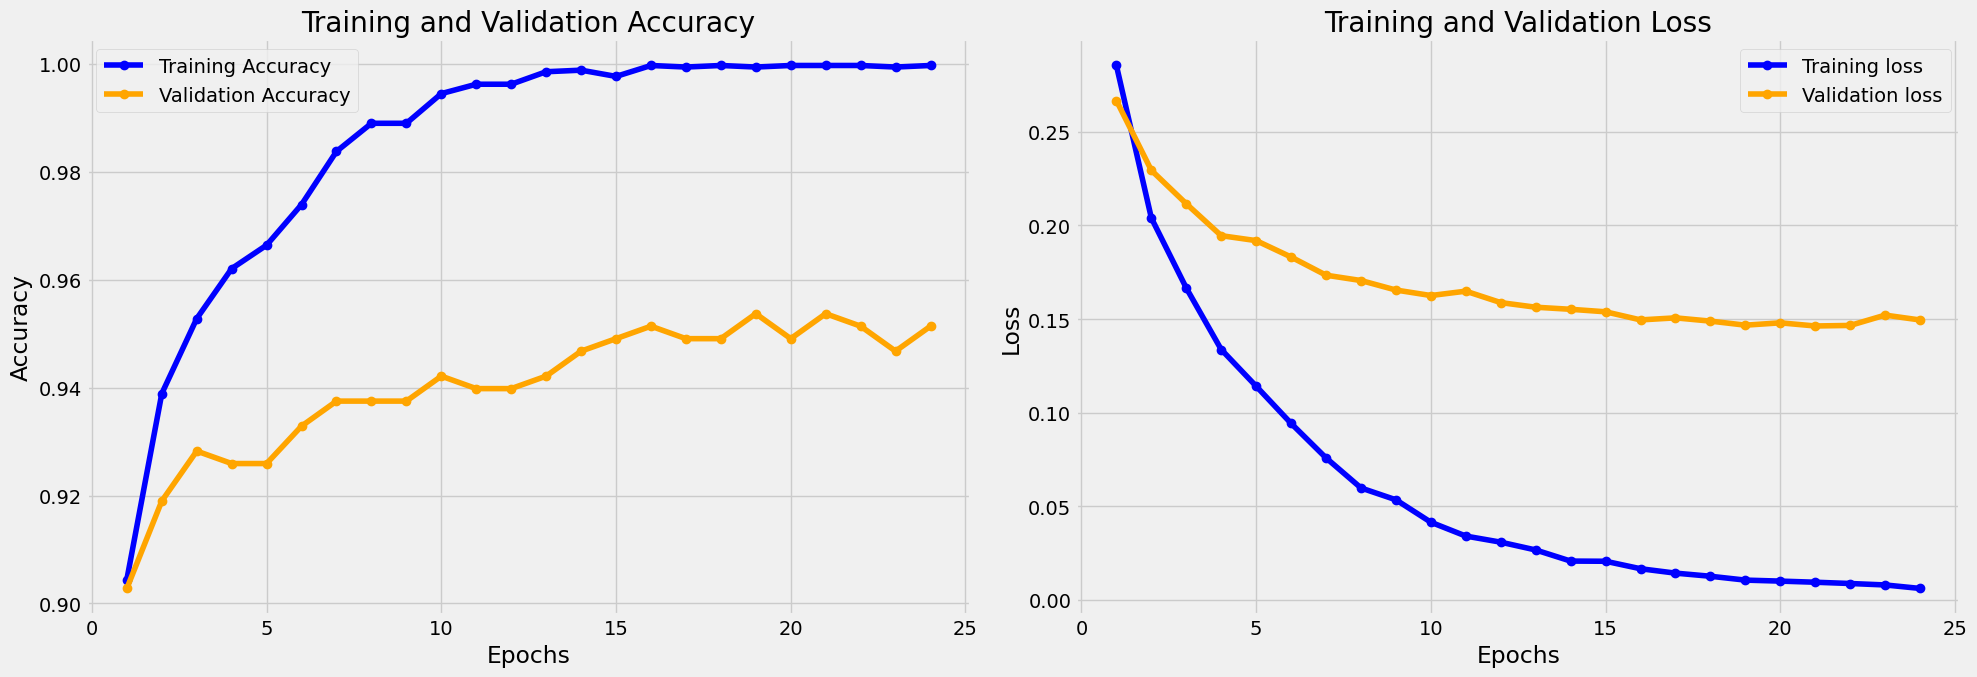

In [ ]:
 model_performance(history_cnv)

### Predictions

In [ ]:
preds = ConvNeXtTiny_model.predict(test_gen_unscaled)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_unscaled.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 396ms/step

              precision    recall  f1-score   support



           0       0.95      0.96      0.95        77

           1       0.96      0.97      0.97       105

           2       0.88      0.96      0.92        78

           3       0.96      0.92      0.94        74

           4       0.97      0.91      0.94        98



    accuracy                           0.94       432

   macro avg       0.94      0.94      0.94       432

weighted avg       0.95      0.94      0.94       432




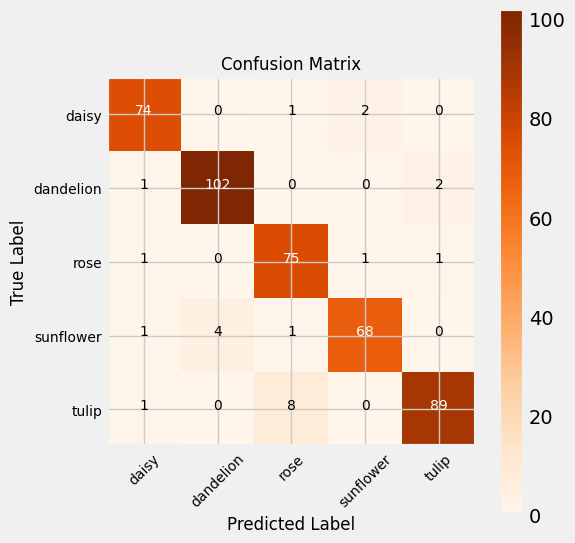

In [ ]:
plot_confusion_matrix(test_gen_unscaled, predictions)

### Save the Model

In [ ]:
# Save the model in Keras format
ConvNeXtTiny_model.save('ConvNeXtTiny_model.keras')

In [ ]:
# Load the model in Keras format
ConvNeXtTiny_model = tf.keras.models.load_model('/kaggle/working/ConvNeXtTiny_model.keras')

## Compare the Model Performances

In [20]:
test_results = [
    {'Model': 'CNN', 'Train_Accuracy': 0.85, 'Val_Accuracy': 0.81},
    {'Model': 'VGG16', 'Train_Accuracy': 0.96, 'Val_Accuracy': 0.91},
    {'Model': 'InceptionV3', 'Train_Accuracy': 0.99, 'Val_Accuracy': 0.93},
    {'Model': 'NasNetMobile', 'Train_Accuracy': 0.96, 'Val_Accuracy': 0.92},
    {'Model': 'EfficientNetB3', 'Train_Accuracy': 0.98, 'Val_Accuracy': 0.94},
    {'Model': 'EfficientNetV2-S', 'Train_Accuracy': 0.99, 'Val_Accuracy': 0.93},
    {'Model': 'ConvNextTiny', 'Train_Accuracy': 0.99, 'Val_Accuracy': 0.95}
     ]


# Transform to DataFrame
results_df = pd.DataFrame(test_results)

# Sort by f1-score and Misclassification together;
sorted_results = results_df.sort_values(by=['Train_Accuracy', 'Val_Accuracy'], ascending=[False, False])

# Show the results by resetting the indexes
sorted_results_reset = sorted_results.reset_index(drop=True)

# Show the results;
print(sorted_results_reset)

              Model  Train_Accuracy  Val_Accuracy
0      ConvNextTiny            0.99          0.95
1       InceptionV3            0.99          0.93
2  EfficientNetV2-S            0.99          0.93
3    EfficientNetB3            0.98          0.94
4      NasNetMobile            0.96          0.92
5             VGG16            0.96          0.91
6               CNN            0.85          0.81


## Conclusion

In this project;

- A detailed exploratory analysis was conducted to identify the images in each class, determine their dimensions, decide whether scaling was needed, and examine the data distribution across classes.
- Preprocessing was performed using **ImageDataGenerator** before each model, ensuring it was tailored to the specific model’s requirements.
- Augmentation and rescaling were applied where needed, except for models that handled preprocessing internally. 
    (If preprocessing were applied within the model, the train-test split would need to be adjusted to work with TensorFlow.)
- For transfer learning models, base models were created by freezing the pretrained layers. After training these base models, fine-tuning was done by unfreezing the pretrained layers and using the best weights from the initial training phase. Each model’s performance was evaluated by making predictions on the test data.

*Since the dataset is small to medium-sized, the smallest versions of the transfer learning models were chosen to avoid overfitting. However, it was observed that even these smaller models were slightly large for the dataset.*


#### Model Selection Summary 🚀
When selecting a model based on the training and validation accuracy scores, the following key factors should be considered:

- **Generalization**: Validation accuracy (Val_Accuracy) is crucial as it indicates how well the model performs on unseen data. 🔍
- **Consistent Performance**: Ideally, the model should exhibit both high training and validation accuracy. A significant gap between these scores may suggest overfitting. ⚠️

#### Analysis of Models:
- **ConvNextTiny (109.42 MB)**: Excellent training accuracy (0.99) and the highest validation accuracy (0.95), demonstrating robust generalization with minimal overfitting. 🌟
- **InceptionV3 (92 MB)**: Strong training accuracy (0.99) and very good validation accuracy (0.93). Reliable and efficient. ⚡️
- **EfficientNetV2-S (88 MB)**: Good training accuracy (0.99) with validation accuracy (0.93), slightly lower compared to ConvNextTiny but still efficient. 🧠
- **EfficientNetB3 (48 MB)**: Very good training accuracy (0.98) and excellent validation accuracy (0.94), indicating strong generalization. 🔥
- **NasNetMobile (23 MB)**: Solid training accuracy (0.96) with good validation accuracy (0.92). A lightweight option for mobile applications. 💡
- **VGG16 (528 MB)**: Lower training accuracy (0.96) and good validation accuracy (0.91). Large model size makes it less favorable compared to others. 🔋
- **CNN**: Significantly lower training (0.85) and validation (0.81) accuracies, suggesting potential underfitting or need for further optimization. ⚠️

#### Recommended Model: ConvNextTiny (109.42 MB) 🎯
**Reason**: ConvNextTiny not only provides the highest validation accuracy (0.95) but also shows the smallest gap between training and validation scores, indicating robust generalization and minimal overfitting. It stands out as the best model for ensuring reliable performance in diverse conditions. 🏅

## Collaboration:

#### Rest of the Transfer Learning Models:
This study, in collaboration with **Fatma Nur Azman**, applies a CNN model along with 10 different transfer learning models to the Flowers Recognition dataset. Additional models explored include:
- EfficientNetB3
- Xception
- ResNet152V2
- DenseNet201
- MobileNetV2

For further details on these models and their implementation, please refer to the Kaggle notebook available at this link: [Flower | CNN + 10 Transfer Learning Models | Part-2](https://www.kaggle.com/code/fnurazman/flower-cnn-10-transfer-learning-models-part-2#Transfer-Learning-Models).

A big thank you to **Fatma Nur Azman** for your help and support throughout this project. I'm truly grateful.

*Thank you to everyone who took the time to engage with this work, whether through comments, feedback, or simply showing support. Your interest means a lot and encourages us to keep learning and improving.*

<div style="text-align: center; font-weight: bold;font-size:120%;">
 If you find this work helpful, don't forget to give it an 👍 UPVOTE! and join the discussion! 💬
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
    Thank you...
</div>

---

<div style="text-align: center;">
  <b>Duygu Jones | Data Scientist | 2024 </b>
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> |
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> |
  <a href="https://github.com/Duygu-Jones">GitHub</a> |
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> |
  <a href="https://medium.com/@duygujones">Medium</a> |
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>

    
</div>   